In [2]:
# ============================================================
# Core scientific stack
# ============================================================

import numpy as np
# NumPy: efficient numerical computations (arrays, linear algebra, math ops)

import pandas as pd
# Pandas: data manipulation and analysis using DataFrames


# ============================================================
# Visualization & exploratory data analysis (EDA)
# ============================================================

import matplotlib.pyplot as plt
# Matplotlib: low-level plotting library

import seaborn as sns
# Seaborn: high-level statistical visualizations built on top of Matplotlib

# Global visualization settings for consistent and readable plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# ============================================================
# Scikit-learn: data splitting & model selection
# ============================================================

from sklearn.model_selection import (
    train_test_split,   # Split dataset into training and test sets
    GridSearchCV,       # Exhaustive hyperparameter search with cross-validation
    cross_val_score     # Cross-validation performance evaluation
)


# ============================================================
# Scikit-learn: preprocessing & pipelines
# ============================================================

from sklearn.compose import ColumnTransformer
# Apply different preprocessing steps to numerical and categorical columns

from sklearn.pipeline import Pipeline
# Build end-to-end machine learning workflows

from sklearn.preprocessing import (
    OneHotEncoder,      # Encode categorical variables into dummy variables
    StandardScaler      # Standardize numerical features (mean=0, std=1)
)

from sklearn.impute import SimpleImputer
# Handle missing values (mean, median, most frequent, etc.)


# ============================================================
# Scikit-learn: evaluation metrics
# ============================================================

from sklearn.metrics import (
    accuracy_score,        # Overall classification accuracy
    precision_score,       # Precision: cost of false positives
    recall_score,          # Recall: ability to detect churners
    f1_score,              # Balance between precision and recall
    classification_report, # Detailed per-class metrics
    roc_auc_score,         # Discriminative power of predicted probabilities
    confusion_matrix       # Error distribution (TP, FP, FN, TN)
)


# ============================================================
# Classical machine learning models
# ============================================================

from sklearn.linear_model import LogisticRegression
# Logistic Regression: interpretable baseline model

from sklearn.ensemble import RandomForestClassifier
# Random Forest: ensemble of decision trees, robust and non-linear


# ============================================================
# Gradient Boosting frameworks
# ============================================================

from xgboost import XGBClassifier
# XGBoost: high-performance gradient boosting (often top benchmark)

from lightgbm import LGBMClassifier
# LightGBM: fast, scalable boosting for large datasets

from catboost import CatBoostClassifier
# CatBoost: boosting algorithm with native categorical feature handling


# ============================================================
# Imbalanced learning utilities
# ============================================================

from imblearn.pipeline import Pipeline as ImbPipeline
# Pipeline that supports resampling techniques

from imblearn.over_sampling import SMOTE
# SMOTE: synthetic oversampling to handle class imbalance


# ============================================================
# Miscellaneous utilities
# ============================================================

import warnings
warnings.filterwarnings("ignore")
# Suppress warnings for cleaner notebook outputs

import time
# Measure execution time and performance

import hashlib
# Generate hashes (e.g., data or model versioning)

import joblib
# Efficient model serialization and persistence


In [5]:
import pandas as pd

df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Business Understanding ##

The objective of this project is to anticipate customer churn for a telecommunications company. Churn represents a major strategic challenge, as the loss of a customer leads to a direct decrease in revenue, while acquiring new customers is costly.

In this dataset, a customer is considered churned when the Churn variable takes the value "Yes", indicating an effective service cancellation.

The model aims to predict the probability of customer churn based on contractual, demographic, and usage-related features (tenure, contract type, subscribed services, monthly charges).

Churn scores can be leveraged by marketing teams to identify at-risk customers and implement targeted retention actions.

In this context, a false negative (a churned customer not detected) has a higher business impact than a false positive. Therefore, recall for the churn class is prioritized as the primary evaluation metric.

In [104]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [105]:
df.shape

(7043, 21)

In [106]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [107]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

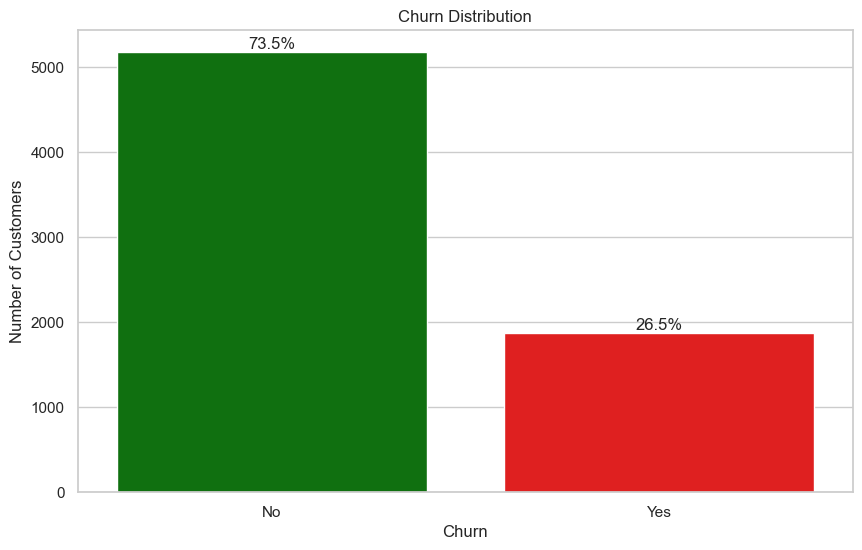

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: bar plot showing the distribution of churned vs non-churned customers
ax = sns.countplot(
    data=df,
    x='Churn',
    palette=['green', 'red']
)

# Total number of observations in the dataset
total = len(df)

# Add percentage labels on top of each bar
for p in ax.patches:
    count = p.get_height()                 # Number of customers in the bar
    pct = count / total * 100              # Percentage of total customers
    ax.annotate(
        f'{pct:.1f}%',                     # Format percentage with one decimal
        (p.get_x() + p.get_width() / 2., count),
        ha='center',
        va='bottom'
    )

# Customize plot titles and axis labels
ax.set_title('Churn Distribution')
ax.set_ylabel('Number of Customers')

# Display the plot
plt.show()


### Conclusion:
The observed churn rate is 26.5%, meaning that slightly more than one out of four customers has left the service. The churn distribution clearly shows a majority of loyal customers (73.5%), but a significant proportion of churners remains to be addressed. This churn rate justifies a deeper analysis of the drivers of churn and the implementation of targeted retention actions.

### Data Audit & Understanding

* The dataset contains contractual, demographic, usage, and financial information related to customers of a telecommunications company. Each observation corresponds to a unique customer identified by the customerID variable, which is used solely as an identifier.

* The target variable Churn is binary and indicates whether a customer has terminated their contract. Preliminary analysis reveals a class imbalance, with the proportion of churned customers being significantly lower than that of active customers. This requires particular attention when selecting evaluation metrics and modeling approaches.

* The main numerical variables are tenure, MonthlyCharges, and TotalCharges. Categorical variables describe subscribed services, contract types, and payment methods. Some binary variables are encoded as text values (Yes/No).

* A consistency analysis highlights an expected strong relationship between tenure, MonthlyCharges, and TotalCharges. The TotalCharges variable requires prior cleaning due to missing or improperly formatted values, particularly for recently acquired customers.

* Finally, no obvious data leakage has been identified at this stage. The dataset is suitable for churn modeling, provided that rigorous preprocessing is applied and class imbalance is properly addressed.

In [109]:
# Safe conversion to numeric types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')


In [110]:
# Descriptive statistics grouped by churn status
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute mean, median, and standard deviation for numerical features
# separately for churned and non-churned customers
stats = df.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std'])

# Display descriptive statistics by churn / non-churn segment
print("Descriptive statistics by churn vs non-churn segment:\n", stats)


Descriptive statistics by churn vs non-churn segment:
           tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
No     37.569965   38.0  24.113777      61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                        
              mean   median          std  
Churn                                     
No     2555.344141  1683.60  2329.456984  
Yes    1531.796094   703.55  1890.822994  


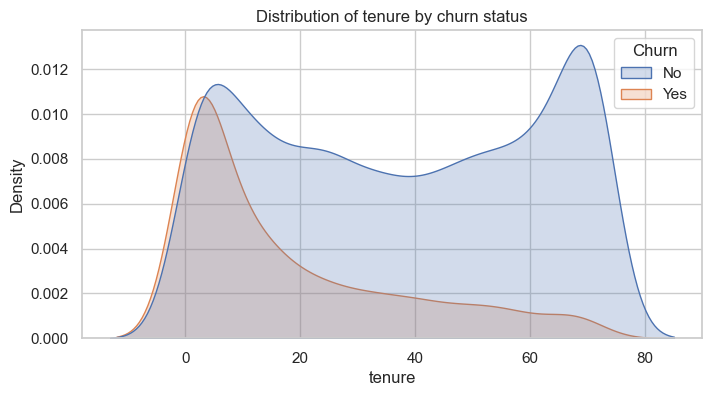

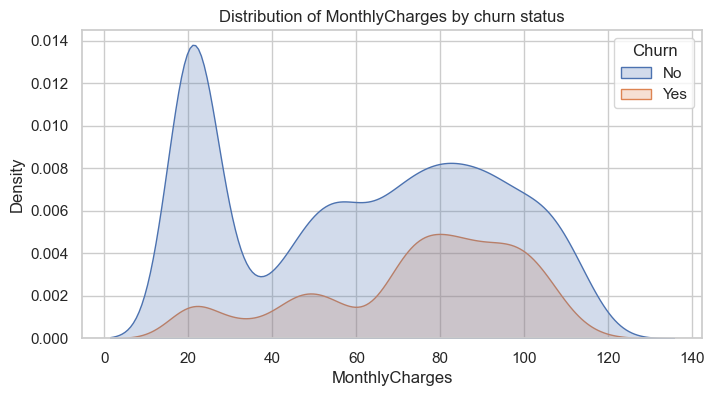

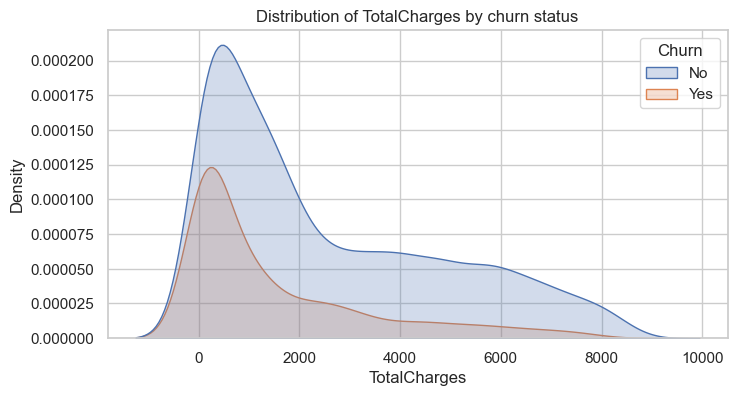

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical features by churn status
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    
    # Kernel Density Estimate plot for each numeric feature
    # Hue differentiates churned vs non-churned customers
    sns.kdeplot(
        data=df,
        x=col,
        hue='Churn',
        fill=True
    )
    
    # Add plot title
    plt.title(f"Distribution of {col} by churn status")
    
    # Display the plot
    plt.show()


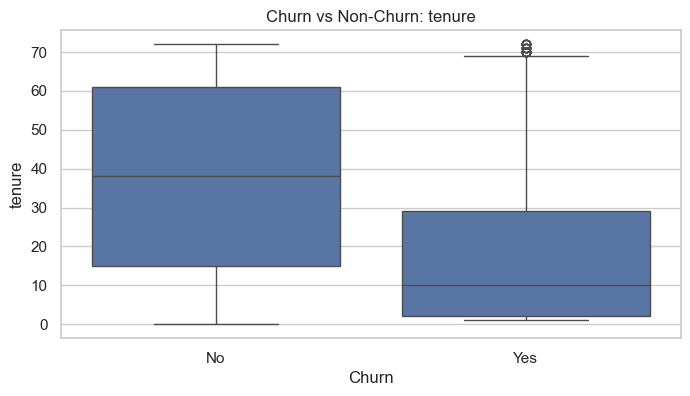

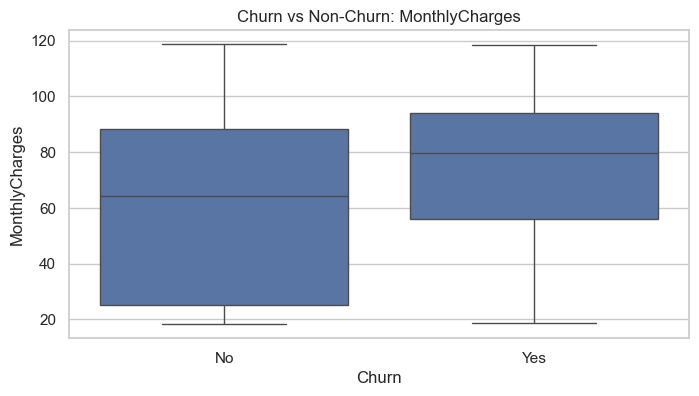

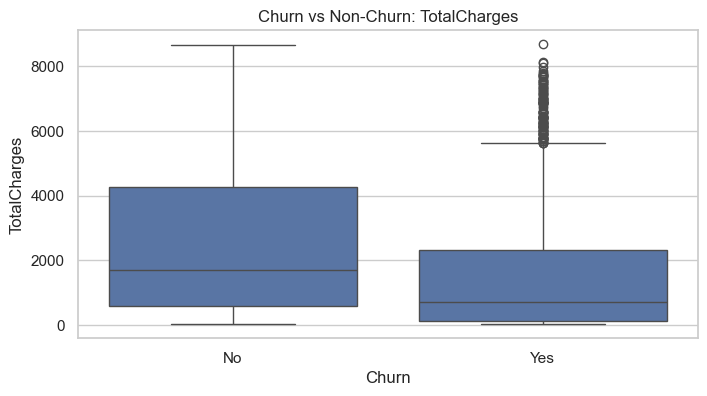

In [112]:
# Boxplots of numerical features by churn status
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    
    # Create a boxplot to compare distributions of the feature
    # for churned vs non-churned customers
    sns.boxplot(
        x='Churn',
        y=col,
        data=df
    )
    
    # Add a descriptive title
    plt.title(f"Churn vs Non-Churn: {col}")
    
    # Display the plot
    plt.show()


## Analysis of Churn vs Non-Churn Segments

### Tenure (Subscription Duration):
Customers who have churned show a significantly shorter tenure (mean = 18 months, median = 10 months) compared to those who stay (mean = 38 months, median = 38 months). This indicates that recent customers are at higher risk of churn.

### Monthly Charges:
Churned customers have higher monthly bills on average (mean = 74.4), suggesting that higher prices may contribute to their decision to leave.

### Total Charges:
Loyal customers have accumulated higher total charges (mean = 2,555), reflecting the correlation between tenure and loyalty.

### Conclusion / Business Insight:
The results indicate that churn is primarily concentrated among recent customers with higher monthly charges. To improve retention, it would be relevant to:

* Offer targeted promotions or discounts to new customers.

* Identify high-billing customers early and provide personalized follow-up.


Churn rate by Contract:
 Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64


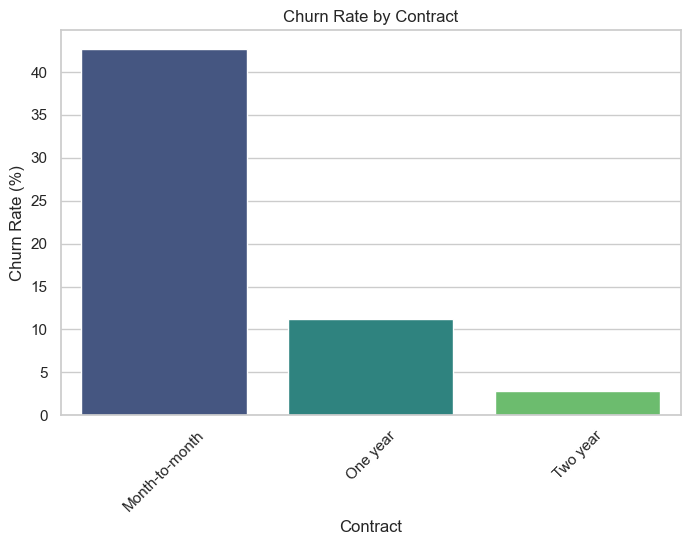


Churn rate by InternetService:
 InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Yes, dtype: float64


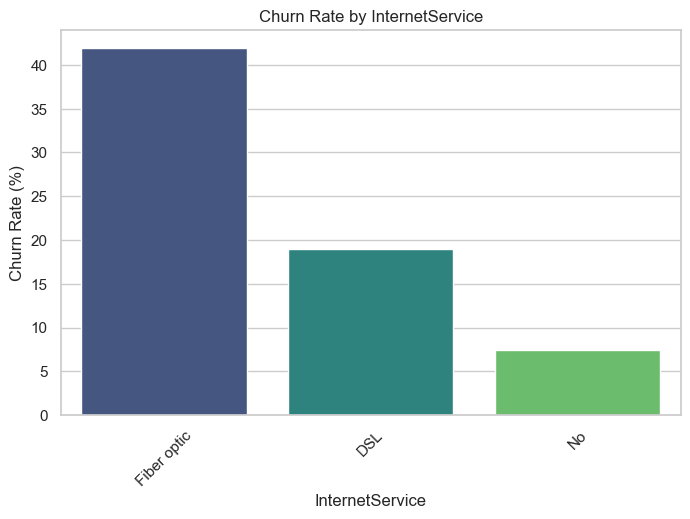


Churn rate by PaymentMethod:
 PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Yes, dtype: float64


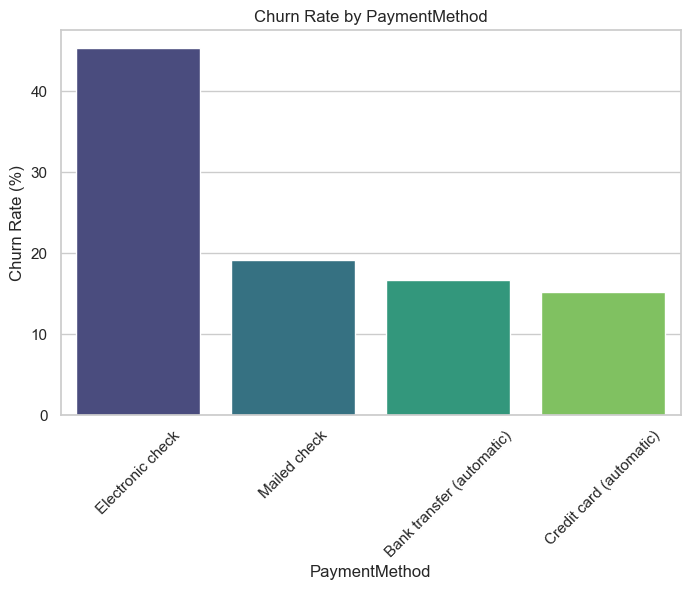


Churn rate by TechSupport:
 TechSupport
No                     41.635474
Yes                    15.166341
No internet service     7.404980
Name: Yes, dtype: float64


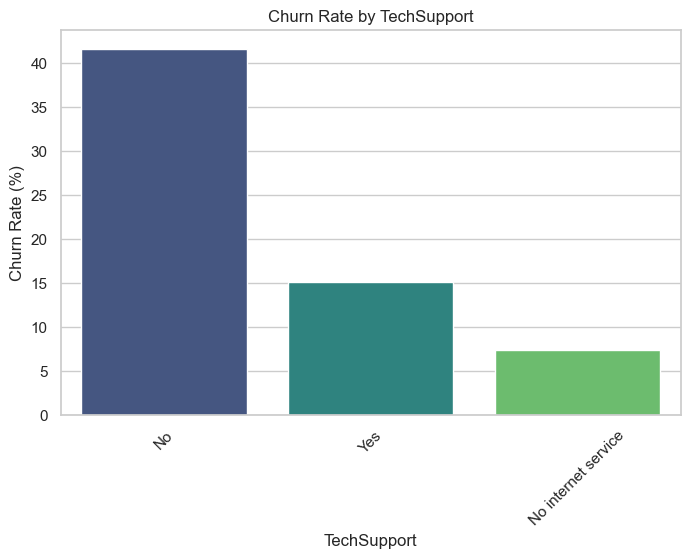


Churn rate by OnlineSecurity:
 OnlineSecurity
No                     41.766724
Yes                    14.611194
No internet service     7.404980
Name: Yes, dtype: float64


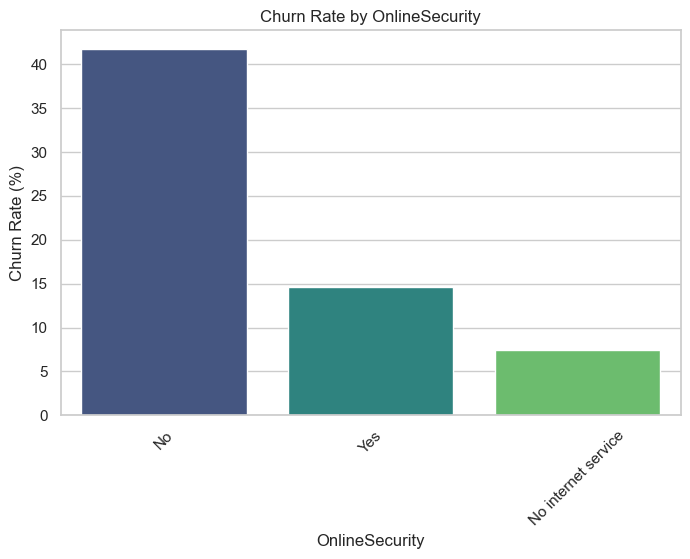

In [113]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your file

# List of key categorical variables to analyze
categorical_vars = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

# Function to calculate and visualize churn rate by category
def churn_by_category(df, var):
    """
    Displays the churn rate per category for a categorical variable,
    along with a bar plot.
    """
    # Calculate churn rate per category
    churn_rate = df.groupby(var)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    churn_rate = churn_rate.sort_values(ascending=False)
    
    # Print churn rate table
    print(f"\nChurn rate by {var}:\n", churn_rate)
    
    # Visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
    plt.ylabel("Churn Rate (%)")
    plt.title(f"Churn Rate by {var}")
    plt.xticks(rotation=45)
    plt.show()

# Loop over all categorical variables
for var in categorical_vars:
    churn_by_category(df, var)


## Analysis of Categorical Variables and Their Impact on Churn

### 1️⃣ Contract Type

Customers with month-to-month contracts have the highest churn rate (~43%).

* One-year and two-year contracts show much lower churn (~11% and 3%).
* Business Insight: Short-term contracts are a high-risk segment. Offering incentives for longer contracts or loyalty benefits could help retain these customers.

### 2️⃣ Internet Service Type

* Churn is very high for fiber optic customers (~42%),moderate for DSL (~19%), and low for customers without internet (~7%).
* Insight: Fiber optic customers are more likely to churn, potentially due to higher costs or competition in this segment.

### 3️⃣ Payment Method

* Customers paying via electronic check have a very high churn (~45%).

* Automatic payments (credit card or bank transfer) have lower churn (~15–17%).
* Insight: Encouraging automatic payments may reduce churn.

### 4️⃣ Tech Support

* Customers without technical support show very high churn (~42%).

* Customers with tech support have significantly lower churn (~15%).
* Insight: Providing technical support is a strong lever for customer retention.

### 5️⃣ Online Security

Customers without online security have high churn (~42%).

* Customers with online security have much lower churn (~15%).
* Insight: Online security services contribute to customer loyalty.

### 🔹 Professional Summary
* High-risk churn segments include: month-to-month contracts, fiber optic service, electronic check payments, lack of tech support, and absence of online security.

Levers to reduce churn:

* Encourage longer-term contracts.

* Promote tech support and online security services.

* Incentivize automatic payment methods.

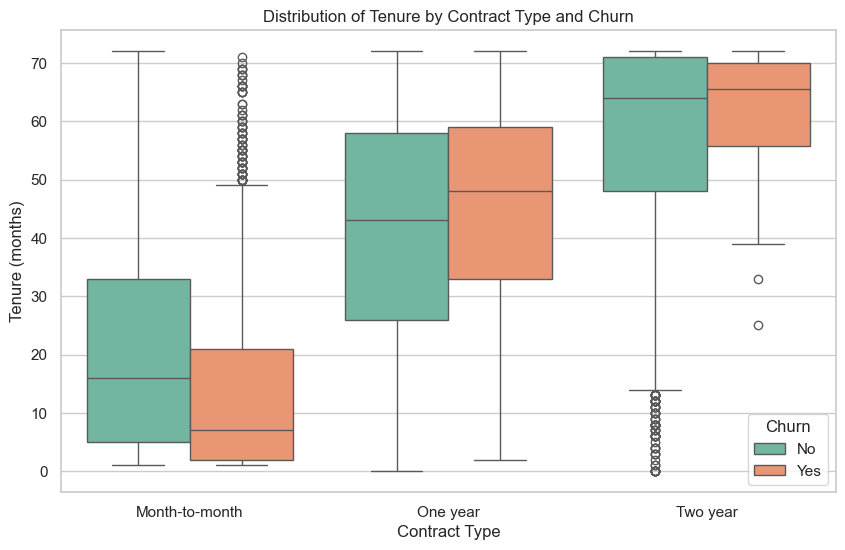


Churn rate by tenure group and contract type:
 tenure_group  Contract      
0-12          Month-to-month    51.354062
              One year          10.569106
              Two year           0.000000
13-24         Month-to-month    37.720488
              One year           8.121827
              Two year           0.000000
25-48         Month-to-month    32.917706
              One year          10.617761
              Two year           2.189781
49-72         Month-to-month    26.023392
              One year          12.933754
              Two year           3.325416
Name: Yes, dtype: float64


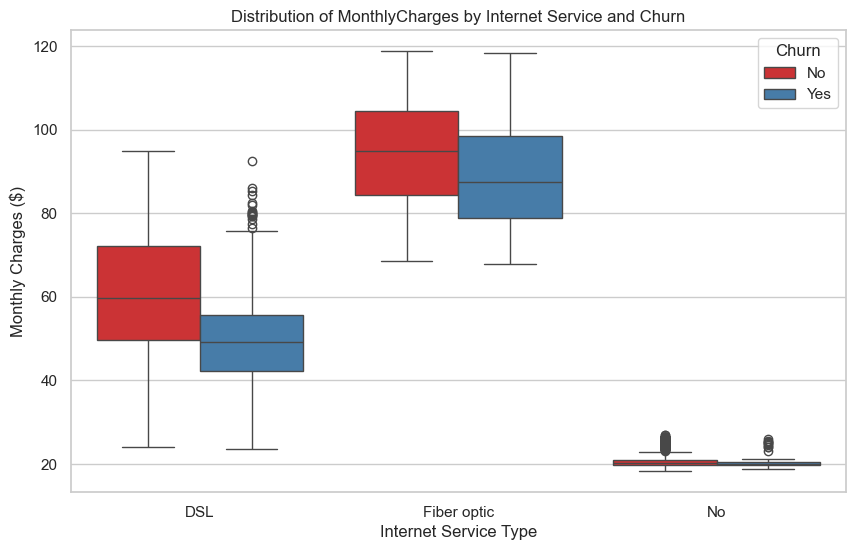


Churn rate by MonthlyCharges group and InternetService:
 MonthlyCharges_group  InternetService
Low                   DSL                36.016949
                      Fiber optic         0.000000
                      No                  7.404980
Medium                DSL                21.121495
                      Fiber optic        59.006211
                      No                  0.000000
High                  DSL                 6.415094
                      Fiber optic        50.937245
                      No                  0.000000
Very High             DSL                 2.000000
                      Fiber optic        33.782201
                      No                  0.000000
Name: Yes, dtype: float64


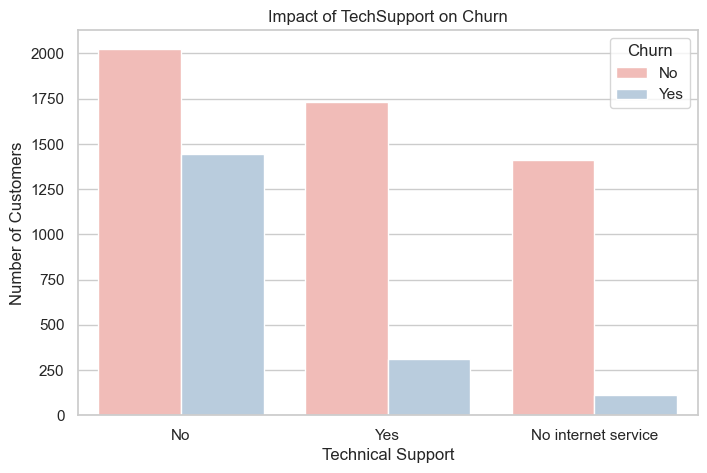

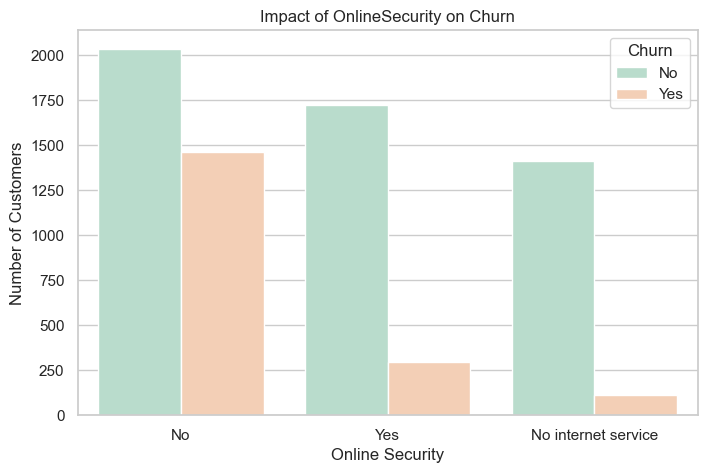


Churn rate by TechSupport and OnlineSecurity:
 Churn                                           No        Yes
TechSupport         OnlineSecurity                           
No                  No                   51.037995  48.962005
                    Yes                  78.695652  21.304348
No internet service No internet service  92.595020   7.404980
Yes                 No                   77.671958  22.328042
                    Yes                  90.991811   9.008189


In [114]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your file

# ------------------------------
# 1️⃣ Relationship: Tenure + Contract
# ------------------------------
plt.figure(figsize=(10, 6))

# Boxplot of tenure by contract type and churn status
sns.boxplot(
    x='Contract',
    y='tenure',
    hue='Churn',
    data=df,
    palette='Set2'
)

plt.title('Distribution of Tenure by Contract Type and Churn')
plt.ylabel('Tenure (months)')
plt.xlabel('Contract Type')
plt.legend(title='Churn')
plt.show()

# Churn rate by tenure group and contract type
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49-72']
)

churn_tenure_contract = df.groupby(['tenure_group', 'Contract'])['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
print("\nChurn rate by tenure group and contract type:\n", churn_tenure_contract)

# ------------------------------
# 2️⃣ Relationship: MonthlyCharges + InternetService
# ------------------------------
plt.figure(figsize=(10, 6))

# Boxplot of MonthlyCharges by InternetService type and churn status
sns.boxplot(
    x='InternetService',
    y='MonthlyCharges',
    hue='Churn',
    data=df,
    palette='Set1'
)

plt.title('Distribution of MonthlyCharges by Internet Service and Churn')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Internet Service Type')
plt.legend(title='Churn')
plt.show()

# Churn rate by MonthlyCharges group and InternetService
df['MonthlyCharges_group'] = pd.qcut(
    df['MonthlyCharges'],
    4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

churn_charge_internet = df.groupby(['MonthlyCharges_group', 'InternetService'])['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
print("\nChurn rate by MonthlyCharges group and InternetService:\n", churn_charge_internet)

# ------------------------------
# 3️⃣ Relationship: TechSupport + OnlineSecurity
# ------------------------------
plt.figure(figsize=(8, 5))

# Count plot of TechSupport vs churn
sns.countplot(
    x='TechSupport',
    hue='Churn',
    data=df,
    palette='Pastel1'
)

plt.title('Impact of TechSupport on Churn')
plt.xlabel('Technical Support')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))

# Count plot of OnlineSecurity vs churn
sns.countplot(
    x='OnlineSecurity',
    hue='Churn',
    data=df,
    palette='Pastel2'
)

plt.title('Impact of OnlineSecurity on Churn')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.show()

# Crosstab: Churn rate by combination of TechSupport and OnlineSecurity
churn_support_security = pd.crosstab(
    index=[df['TechSupport'], df['OnlineSecurity']],
    columns=df['Churn'],
    normalize='index'
) * 100

print("\nChurn rate by TechSupport and OnlineSecurity:\n", churn_support_security)


## Analysis of Variable Relationships

### 1️⃣ Tenure + Contract

Recent customers (0–12 months) with month-to-month contracts show extremely high churn (~51%), while those with two-year contracts almost never churn.

Even for older customers (49–72 months), churn remains higher for month-to-month contracts (~26%) compared to annual or two-year contracts.
Insight: The combination of new customer + month-to-month contract clearly identifies a high-risk churn segment, making it a priority for targeted retention actions.

### 2️⃣ MonthlyCharges + InternetService

Customers with medium to high monthly charges using fiber optic service exhibit particularly high churn (~33%–59%, depending on the group).

In contrast, DSL customers or those without internet have lower churn, even in the “High” and “Very High” billing groups for DSL.
Insight: High-billing fiber customers are more vulnerable to churn, suggesting that retention strategies should focus on this segment.

### 3️⃣ TechSupport + OnlineSecurity

Lack of technical support and online security results in very high churn (~49% for “No TechSupport + No OnlineSecurity”).

Customers with TechSupport and OnlineSecurity have much lower churn (~9%).

Even among customers without internet service, churn remains low (~7%).
Insight: Access to support and security services is a key lever to reduce churn, especially for recent customers or high-billing clients.

### 🔹 Professional Summary

High-risk segments:

Recent customers with month-to-month contracts

Medium/high billing fiber optic customers

Customers without technical support and online security

Levers to reduce churn:

Incentivize upgrades to longer-term contracts

Offer targeted promotions for high-billing fiber customers

Promote technical support and online security services

## Anomaly and Inconsistency Detection

##### Objective: Ensure data reliability before any analysis or decision-making. Errors or inconsistencies can lead to incorrect conclusions and directly affect retention and pricing strategies.

### Key Checks:

* TotalCharges < MonthlyCharges: Possible inconsistency in data entry or calculation of total charges.

* tenure = 0 with high charges: Customers appear billed despite just subscribing.

* Impossible or out-of-range values: e.g., negative charges, incorrect dates, or nonexistent categories.

### Business Impact:

* Anomalies can distort churn calculations, customer segmentation, and marketing decisions.

* Incorrect data may result in inappropriate campaigns, revenue loss, and misallocation of resources.

In [16]:
# Import libraries
import pandas as pd

# Load the dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your file

# ------------------------------
# 1️⃣ TotalCharges < MonthlyCharges
# ------------------------------
# Detect customers whose TotalCharges are less than their MonthlyCharges
anomalies_total_lt_monthly = df[df['TotalCharges'] < df['MonthlyCharges']]
print(f"\nNumber of anomalies where TotalCharges < MonthlyCharges: {len(anomalies_total_lt_monthly)}")
print(anomalies_total_lt_monthly[['customerID', 'MonthlyCharges', 'TotalCharges']])

# ------------------------------
# 2️⃣ Tenure = 0 but high charges
# ------------------------------
# Define "high charges" as TotalCharges > 0 for customers with tenure=0
anomalies_tenure0_charges = df[(df['tenure'] == 0) & (df['TotalCharges'] > 0)]
print(f"\nNumber of anomalies where tenure=0 but TotalCharges > 0: {len(anomalies_tenure0_charges)}")
print(anomalies_tenure0_charges[['customerID', 'tenure', 'TotalCharges']])

# ------------------------------
# 3️⃣ Impossible or out-of-range values
# ------------------------------
# Examples: negative charges, negative tenure
anomalies_negatives = df[(df['MonthlyCharges'] < 0) | (df['TotalCharges'] < 0) | (df['tenure'] < 0)]
print(f"\nNumber of negative values detected: {len(anomalies_negatives)}")
print(anomalies_negatives[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# For categorical variables: check for unknown or invalid values
categorical_vars = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']
for var in categorical_vars:
    invalid_values = df[~df[var].isin(df[var].dropna().unique())]
    if not invalid_values.empty:
        print(f"\nUnknown values detected for {var}:")
        print(invalid_values[[var, 'customerID']])



Number of anomalies where TotalCharges < MonthlyCharges: 0
Empty DataFrame
Columns: [customerID, MonthlyCharges, TotalCharges]
Index: []

Number of anomalies where tenure=0 but TotalCharges > 0: 0
Empty DataFrame
Columns: [customerID, tenure, TotalCharges]
Index: []

Number of negative values detected: 0
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, TotalCharges]
Index: []


## Conclusion

The data appears consistent and reliable, ensuring that churn analyses, customer segmentation, and business recommendations are based on accurate information.

### Business Impact:

* High data quality allows marketing and business decisions to be made without risk of errors due to inconsistencies.

* Subsequent analyses can focus on customer behavior and churn without the need for extensive data cleaning.

## Summary of Exploratory Data Analysis (EDA)

#### Objective:
The EDA aims to understand who churns, why they churn, and which business levers can be activated to improve retention.

### Key Insights:

* Churn is strongly concentrated among recent customers (low tenure).

* Month-to-month contracts and electronic check payments are associated with a high risk of churn.

* The absence of technical support and online security services significantly increases churn.

* Customers with longer contracts or additional services are much less likely to churn.

### Identified Business Levers:

* Retention of new customers: offer incentives to upgrade to annual or two-year contracts.

* Encourage automatic payments (bank transfer or credit card) to reduce churn linked to manual payment methods.

* Enhance support and additional services (TechSupport, OnlineSecurity) to increase customer satisfaction and loyalty.

* Targeted segmentation: prioritize retention actions for high-risk profiles identified by the combination of low tenure + month-to-month contract + electronic payment.

In [17]:
import pandas as pd

# Create the EDA summary table
eda_summary = pd.DataFrame({
    "High-Risk Profile": [
        "Recent Customers",
        "Month-to-Month Contracts",
        "Electronic Payment",
        "High-Billing Fiber Customers",
        "No TechSupport & No OnlineSecurity",
        "Loyal Customers"
    ],
    "Key Feature": [
        "Tenure ≤ 12 months",
        "Short-term contract",
        "Electronic check",
        "MonthlyCharges > average, InternetService=Fiber",
        "TechSupport=No, OnlineSecurity=No",
        "Long-term contracts, active support, security"
    ],
    "Churn Rate (%)": [
        "50+",
        "26–51",
        "45",
        "33–59",
        "42–49",
        "3–15"
    ],
    "Recommended Business Levers": [
        "Offer incentives for annual or two-year contracts",
        "Promote upgrades to longer contracts",
        "Encourage automatic payments (bank transfer/credit card)",
        "Provide additional services and personalized support",
        "Activate TechSupport and OnlineSecurity to retain customers",
        "Maintain services and monitor satisfaction"
    ]
})

# Display the table in the notebook
eda_summary

# Styling for better presentation
eda_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                 ('color', 'white'),
                                 ('text-align', 'center')]},
    {'selector': 'td', 'props': [('padding', '8px')]}
]).set_properties(**{'text-align': 'left'})


,High-Risk Profile,Key Feature,Churn Rate (%),Recommended Business Levers
0,Recent Customers,Tenure ≤ 12 months,50+,Offer incentives for annual or two-year contracts
1,Month-to-Month Contracts,Short-term contract,26–51,Promote upgrades to longer contracts
2,Electronic Payment,Electronic check,45,Encourage automatic payments (bank transfer/credit card)
3,High-Billing Fiber Customers,"MonthlyCharges > average, InternetService=Fiber",33–59,Provide additional services and personalized support
4,No TechSupport & No OnlineSecurity,"TechSupport=No, OnlineSecurity=No",42–49,Activate TechSupport and OnlineSecurity to retain customers
5,Loyal Customers,"Long-term contracts, active support, security",3–15,Maintain services and monitor satisfaction


## Data Preprocessing – Features / Target Separation

#### Objective: Prepare data that can be effectively used by machine learning models while avoiding data leakage and preserving business meaning.

### Approach:Before any transformation, the dataset is split into:

* Target variable: Churn

* Features (explanatory variables): all other variables

* The customerID column is removed because it is a unique identifier with no predictive value and could introduce noise into the model.

In [18]:
# -----------------------------
# Features / Target Separation
# -----------------------------

# Target variable
y = df['Churn']

# Features: exclude target and unique identifier
X = df.drop(columns=['Churn', 'customerID'])

# Verify shapes
print("Features shape:", X.shape)
print("Target shape  :", y.shape)

# Preview first rows and target distribution
X.head(), y.value_counts()


Features shape: (7043, 21)
Target shape  : (7043,)


(   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  Female              0     Yes         No       1           No   
 1    Male              0      No         No      34          Yes   
 2    Male              0      No         No       2          Yes   
 3    Male              0      No         No      45           No   
 4  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
 0  No phone service             DSL             No          Yes  ...   
 1                No             DSL            Yes           No  ...   
 2                No             DSL            Yes          Yes  ...   
 3  No phone service             DSL            Yes           No  ...   
 4                No     Fiber optic             No           No  ...   
 
   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
 0          No          No              No  Month-to-month       

Variable Type Identification (Full Dataset)

The dataset contains multiple feature types that require different preprocessing strategies.
Variables were classified into three main categories:

Numerical variables (tenure, MonthlyCharges, TotalCharges)
Continuous variables with meaningful mathematical operations.

Binary variables (SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling)
Two-level variables representing boolean or yes/no information.

Categorical variables (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod)
Nominal variables with multiple categories and no intrinsic order.

This structured classification ensures appropriate encoding, scaling, and imputation in subsequent preprocessing steps.

In [19]:
# ============================================================
# Feature Typing
# ============================================================
# Only two feature types are retained:
# - Numerical features
# - Categorical features
#
# Binary variables are intentionally treated as categorical
# to ensure consistent encoding and avoid arbitrary assumptions.
# ============================================================

numerical_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]

categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Contract",
    "PaymentMethod",
    "InternetService",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Sanity check
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [20]:
# ============================================================
# Feature coverage validation
# ============================================================

all_features = numerical_features + categorical_features

# Identify unexpected or missing columns
unused_columns = set(X.columns) - set(all_features)
print("Unused columns in dataset:", unused_columns)


Unused columns in dataset: {'MonthlyCharges_group', 'tenure_group'}


In [21]:
# ============================================================
# Feature Selection – Final Decision
# ============================================================
# Variables created during exploratory analysis
# (MonthlyCharges_group, tenure_group) are removed to avoid:
# - redundancy
# - information loss
#
# Original continuous variables carry richer signals and are
# better suited for machine learning models.
# ============================================================

X = X.drop(
    columns=["MonthlyCharges_group", "tenure_group"],
    errors="ignore"
)


In [22]:
# ============================================================
# Missing Values Handling – Business-Aware Strategy
# ============================================================

# Explicit missing-value indicator
X["TotalCharges_missing"] = X["TotalCharges"].isna().astype(int)

# Group-based median imputation by contract type
X["TotalCharges"] = (
    X.groupby("Contract")["TotalCharges"]
     .transform(lambda x: x.fillna(x.median()))
)


In [23]:
# ============================================================
# Numerical preprocessing
# ============================================================

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [24]:
# ============================================================
# Categorical preprocessing
# ============================================================
# One-Hot Encoding is used to:
# - avoid artificial ordering
# - preserve interpretability
# - ensure compatibility with linear models
# ============================================================

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        drop="first"
    ))
])


In [25]:
# ============================================================
# Global Preprocessing Pipeline
# ============================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


The dataset is imbalanced, with churners being a minority.

Professional mitigation strategies include:
- class_weight="balanced" for linear models
- scale_pos_weight for tree-based models
- threshold optimization based on business objectives

This ensures the model focuses on high-risk customers
without sacrificing overall performance.


In [26]:
# ============================================================
# Target encoding (mandatory for sklearn models)
# ============================================================

y = y.map({"No": 0, "Yes": 1})


In [27]:
# 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    stratify=y,
    random_state=42,
)

# 20% val, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42,
)



# Logistic Regression

In [28]:
# ============================================================
# Imports
# ============================================================
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# ============================================================
# 1. Modeling Pipeline
# ============================================================
best_model_log_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("logreg", LogisticRegression(
            solver="liblinear",
            class_weight={0: 2, 1: 5},
            max_iter=1000,
            random_state=42
        ))
    ]
)

# ============================================================
# 2. Hyperparameter search
# ============================================================
param_grid_log = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__penalty": ["l1", "l2"],
}

grid_search_log = GridSearchCV(
    estimator=best_model_log_pipeline,
    param_grid=param_grid_log,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_log.fit(X_train, y_train)
best_model_log = grid_search_log.best_estimator_

# ============================================================
# 3. Validation probabilities & seuils
# ============================================================
y_val_proba_log = best_model_log.predict_proba(X_val)[:, 1]

def find_best_threshold_f1_log(y_true, y_proba):
    thresholds = np.arange(0.01, 1.0, 0.01)
    best = {"threshold": None, "f1": -1, "precision": None, "recall": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best["f1"]:
            best.update({
                "threshold": t,
                "f1": f1,
                "precision": precision_score(y_true, y_pred, zero_division=0),
                "recall": recall_score(y_true, y_pred),
            })
    return best

def find_best_threshold_recall_log(y_true, y_proba, min_precision=0.45):
    thresholds = np.arange(0.01, 1.0, 0.01)
    best = {"threshold": None, "recall": -1, "precision": None, "f1": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        if precision >= min_precision and recall > best["recall"]:
            best.update({
                "threshold": t,
                "recall": recall,
                "precision": precision,
                "f1": f1,
            })
    return best

balanced_val_log = find_best_threshold_f1_log(y_val, y_val_proba_log)
aggressive_val_log = find_best_threshold_recall_log(y_val, y_val_proba_log, min_precision=0.45)

# ============================================================
# 4. Final evaluation on TEST
# ============================================================
y_test_proba_log = best_model_log.predict_proba(X_test)[:, 1]
roc_auc_test_log = roc_auc_score(y_test, y_test_proba_log)

y_test_pred_balanced_log = (y_test_proba_log >= balanced_val_log["threshold"]).astype(int)
y_test_pred_aggressive_log = (y_test_proba_log >= aggressive_val_log["threshold"]).astype(int)

balanced_test_metrics_log = {
    "precision": precision_score(y_test, y_test_pred_balanced_log),
    "recall": recall_score(y_test, y_test_pred_balanced_log),
    "f1": f1_score(y_test, y_test_pred_balanced_log),
}
aggressive_test_metrics_log = {
    "precision": precision_score(y_test, y_test_pred_aggressive_log),
    "recall": recall_score(y_test, y_test_pred_aggressive_log),
    "f1": f1_score(y_test, y_test_pred_aggressive_log),
}

cv_mean_log = grid_search_log.cv_results_["mean_test_score"][grid_search_log.best_index_]
cv_std_log = grid_search_log.cv_results_["std_test_score"][grid_search_log.best_index_]

# ============================================================
# 5. Reporting (TEST)
# ============================================================
results_log = pd.DataFrame([
    {
        "strategy": "Balanced (F1 max)",
        "threshold": balanced_val_log["threshold"],
        "roc_auc_test": roc_auc_test_log,
        "cv_mean": cv_mean_log,
        "cv_std": cv_std_log,
        "precision_churn": balanced_test_metrics_log["precision"],
        "recall_churn": balanced_test_metrics_log["recall"],
        "f1_churn": balanced_test_metrics_log["f1"],
    },
    {
        "strategy": "Aggressive (Recall max)",
        "threshold": aggressive_val_log["threshold"],
        "roc_auc_test": roc_auc_test_log,
        "cv_mean": cv_mean_log,
        "cv_std": cv_std_log,
        "precision_churn": aggressive_test_metrics_log["precision"],
        "recall_churn": aggressive_test_metrics_log["recall"],
        "f1_churn": aggressive_test_metrics_log["f1"],
    }
])

results_log


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,strategy,threshold,roc_auc_test,cv_mean,cv_std,precision_churn,recall_churn,f1_churn
0,Balanced (F1 max),0.85,0.830716,0.580265,0.009474,0.570681,0.582888,0.576720
1,Aggressive (Recall max),0.59,0.830716,0.580265,0.009474,0.448322,0.893048,0.596962


# HistGradientBoostingClassifier

In [29]:
"""
Churn prediction using HistGradientBoostingClassifier
- Class imbalance handling via class_weight
- Hyperparameter tuning with GridSearchCV
- Business-oriented threshold optimization
"""

import numpy as np
import pandas as pd

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report
)

# =====================================================
# 1️⃣ Class imbalance handling (TRAIN ONLY)
# =====================================================

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

class_weight = {
    0: 1.0,
    1: pos_weight
}

# =====================================================
# 2️⃣ Model & pipeline definition
# =====================================================

hgb_model = HistGradientBoostingClassifier(
    random_state=42,
    class_weight=class_weight
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", hgb_model)
    ]
)

# =====================================================
# 3️⃣ Hyperparameter tuning (TRAIN only)
# =====================================================

param_grid = {
    "classifier__max_iter": [200, 400],
    "classifier__learning_rate": [0.05, 0.1],
    "classifier__max_depth": [3, 5, None],
    "classifier__min_samples_leaf": [20, 50],
    "classifier__l2_regularization": [0.0, 0.1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best hyperparameters:")
print(grid_search.best_params_)

# =====================================================
# 4️⃣ Probabilities on VALIDATION (threshold selection)
# =====================================================

y_val_proba = best_model.predict_proba(X_val)[:, 1]

# =====================================================
# 5️⃣ Threshold optimization utilities (UNCHANGED)
# =====================================================

def find_best_threshold_max_f1(y_true, y_proba, thresholds):
    best = {
        "threshold": None,
        "f1": -1,
        "precision": None,
        "recall": None,
    }

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        f1 = f1_score(y_true, y_pred)
        if f1 > best["f1"]:
            best.update(
                {
                    "threshold": t,
                    "f1": f1,
                    "precision": precision_score(y_true, y_pred),
                    "recall": recall_score(y_true, y_pred),
                }
            )
    return best


def find_best_threshold_max_recall(y_true, y_proba, thresholds, min_precision):
    best = {
        "threshold": None,
        "recall": -1,
        "f1": None,
        "precision": None,
    }

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)

        if precision >= min_precision and recall > best["recall"]:
            best.update(
                {
                    "threshold": t,
                    "recall": recall,
                    "precision": precision,
                    "f1": f1_score(y_true, y_pred),
                }
            )
    return best

# =====================================================
# 6️⃣ Threshold search on VALIDATION
# =====================================================

thresholds = np.arange(0.01, 1.00, 0.01)

balanced_val = find_best_threshold_max_f1(
    y_val, y_val_proba, thresholds
)

MIN_PRECISION = 0.45

aggressive_val = find_best_threshold_max_recall(
    y_val, y_val_proba, thresholds, MIN_PRECISION
)

# =====================================================
# 7️⃣ FINAL evaluation on TEST (NO DECISIONS HERE)
# =====================================================

y_test_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc_test = roc_auc_score(y_test, y_test_proba)

y_test_pred_balanced = (
    y_test_proba >= balanced_val["threshold"]
).astype(int)

y_test_pred_aggressive = (
    y_test_proba >= aggressive_val["threshold"]
).astype(int)

# =====================================================
# 8️⃣ Metrics on TEST
# =====================================================

balanced_test_metrics = {
    "precision": precision_score(y_test, y_test_pred_balanced),
    "recall": recall_score(y_test, y_test_pred_balanced),
    "f1": f1_score(y_test, y_test_pred_balanced),
}

aggressive_test_metrics = {
    "precision": precision_score(y_test, y_test_pred_aggressive),
    "recall": recall_score(y_test, y_test_pred_aggressive),
    "f1": f1_score(y_test, y_test_pred_aggressive),
}

cv_mean = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
cv_std = grid_search.cv_results_["std_test_score"][grid_search.best_index_]

# =====================================================
# 9️⃣ Business-ready results table (TEST ONLY)
# =====================================================

df_strategies = pd.DataFrame(
    [
        {
            "strategy": "Balanced (max F1)",
            "threshold": balanced_val["threshold"],
            "roc_auc_test": roc_auc_test,
            "cv_score_mean": cv_mean,
            "cv_score_std": cv_std,
            "precision_churn": balanced_test_metrics["precision"],
            "recall_churn": balanced_test_metrics["recall"],
            "f1_churn": balanced_test_metrics["f1"],
        },
        {
            "strategy": "Aggressive (Recall max)",
            "threshold": aggressive_val["threshold"],
            "roc_auc_test": roc_auc_test,
            "cv_score_mean": cv_mean,
            "cv_score_std": cv_std,
            "precision_churn": aggressive_test_metrics["precision"],
            "recall_churn": aggressive_test_metrics["recall"],
            "f1_churn": aggressive_test_metrics["f1"],
        },
    ]
)

print("\nClassification Report (Aggressive strategy — TEST):\n")
print(classification_report(y_test, y_test_pred_aggressive))

df_strategies


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters:
{'classifier__l2_regularization': 0.0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__max_iter': 400, 'classifier__min_samples_leaf': 20}

Classification Report (Aggressive strategy — TEST):

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1035
           1       0.45      0.88      0.59       374

    accuracy                           0.68      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.80      0.68      0.70      1409



,strategy,threshold,roc_auc_test,cv_score_mean,cv_score_std,precision_churn,recall_churn,f1_churn
0,Balanced (max F1),0.59,0.820751,0.632527,0.012738,0.520747,0.671123,0.586449
1,Aggressive (Recall max),0.34,0.820751,0.632527,0.012738,0.449315,0.877005,0.594203


# XGBClassifier

In [30]:
def compute_class_weight(y):
    """Compute class weights based on imbalance."""
    pos_weight = (y == 0).sum() / (y == 1).sum()
    return {0: 1, 1: pos_weight}


In [31]:
class_weight = compute_class_weight(y_train)


In [32]:
def build_hgb_pipeline(preprocessor, class_weight, random_state=42):
    """Create HistGradientBoosting pipeline."""
    model = HistGradientBoostingClassifier(
        random_state=random_state,
        class_weight=class_weight
    )

    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


In [33]:
pipeline = build_hgb_pipeline(preprocessor, class_weight)


In [34]:
param_grid = {
    'classifier__max_iter': [200, 400],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5, None],
    'classifier__min_samples_leaf': [20, 50],
    'classifier__l2_regularization': [0.0, 0.1]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'classifier__l2_regularization': 0.0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__max_iter': 400, 'classifier__min_samples_leaf': 20}


In [35]:
def find_best_threshold_f1(y_true, y_proba, thresholds):
    best = {
        "threshold": None,
        "f1": -1,
        "precision": None,
        "recall": None
    }

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        f1 = f1_score(y_true, y_pred)
        if f1 > best["f1"]:
            best.update({
                "threshold": t,
                "f1": f1,
                "precision": precision_score(y_true, y_pred),
                "recall": recall_score(y_true, y_pred)
            })

    return best


In [36]:
def find_best_threshold_recall(
    y_true,
    y_proba,
    thresholds,
    min_precision
):
    best = {
        "threshold": None,
        "recall": -1,
        "f1": None,
        "precision": None
    }

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)

        if precision >= min_precision and recall > best["recall"]:
            best.update({
                "threshold": t,
                "recall": recall,
                "precision": precision,
                "f1": f1_score(y_true, y_pred)
            })

    return best


In [37]:
# === VALIDATION probabilities (threshold tuning)
y_val_proba = best_model.predict_proba(X_val)[:, 1]


In [38]:
thresholds = np.arange(0.01, 1.00, 0.01)

balanced_val = find_best_threshold_f1(
    y_val,
    y_val_proba,
    thresholds
)

aggressive_val = find_best_threshold_recall(
    y_val,
    y_val_proba,
    thresholds,
    min_precision=0.45
)


In [39]:
# === TEST probabilities
y_test_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_proba)

y_test_pred_balanced = (
    y_test_proba >= balanced_val["threshold"]
).astype(int)

y_test_pred_aggressive = (
    y_test_proba >= aggressive_val["threshold"]
).astype(int)


In [40]:
balanced_test_metrics = {
    "precision": precision_score(y_test, y_test_pred_balanced),
    "recall": recall_score(y_test, y_test_pred_balanced),
    "f1": f1_score(y_test, y_test_pred_balanced)
}

aggressive_test_metrics = {
    "precision": precision_score(y_test, y_test_pred_aggressive),
    "recall": recall_score(y_test, y_test_pred_aggressive),
    "f1": f1_score(y_test, y_test_pred_aggressive)
}


In [41]:
results_summary = pd.DataFrame([
    {
        "strategy": "Balanced (max F1)",
        "threshold": balanced_val["threshold"],
        "roc_auc_test": roc_auc,
        "cv_score_mean": cv_mean,
        "cv_score_std": cv_std,
        "precision_churn": balanced_test_metrics["precision"],
        "recall_churn": balanced_test_metrics["recall"],
        "f1_churn": balanced_test_metrics["f1"]
    },
    {
        "strategy": "Aggressive (Recall max)",
        "threshold": aggressive_val["threshold"],
        "roc_auc_test": roc_auc,
        "cv_score_mean": cv_mean,
        "cv_score_std": cv_std,
        "precision_churn": aggressive_test_metrics["precision"],
        "recall_churn": aggressive_test_metrics["recall"],
        "f1_churn": aggressive_test_metrics["f1"]
    }
])
results_summary

,strategy,threshold,roc_auc_test,cv_score_mean,cv_score_std,precision_churn,recall_churn,f1_churn
0,Balanced (max F1),0.59,0.820751,0.632527,0.012738,0.520747,0.671123,0.586449
1,Aggressive (Recall max),0.34,0.820751,0.632527,0.012738,0.449315,0.877005,0.594203


# RandomForestClassifier

In [42]:
"""
Churn prediction with RandomForest
- Preprocessing + SMOTE inside an imblearn Pipeline
- Hyperparameter tuning with GridSearchCV
- Business-driven threshold optimization
- Proper train/validation/test split
"""

import numpy as np
import pandas as pd

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)
import joblib
import hashlib
import datetime
import json
from pathlib import Path

# =====================================================
# 1️⃣ Pipeline definition
# =====================================================

rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),        # Encoding + scaling
        ("smote", SMOTE(random_state=42)),     # Handle class imbalance
        (
            "classifier",
            RandomForestClassifier(
                random_state=42,
                class_weight="balanced"
            ),
        ),
    ]
)

# =====================================================
# 2️⃣ Hyperparameter grid
# =====================================================

param_grid_rf = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__max_features": ["sqrt", "log2", 0.5],
}

# =====================================================
# 3️⃣ GridSearchCV (optimize F1 on train)
# =====================================================

grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1,
)

grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

print("RandomForest - Best hyperparameters:")
print(grid_search_rf.best_params_)

# =====================================================
# 4️⃣ Threshold optimization utilities
# =====================================================

def find_best_threshold_max_f1_rf(y_true, y_proba, thresholds):
    best = {"threshold": None, "f1": -1, "precision": None, "recall": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best["f1"]:
            best.update({
                "threshold": t,
                "f1": f1,
                "precision": precision_score(y_true, y_pred),
                "recall": recall_score(y_true, y_pred),
            })
    return best

def find_best_threshold_max_recall_rf(y_true, y_proba, thresholds, min_precision):
    best = {"threshold": None, "recall": -1, "precision": None, "f1": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        if precision >= min_precision and recall > best["recall"]:
            best.update({
                "threshold": t,
                "recall": recall,
                "precision": precision,
                "f1": f1_score(y_true, y_pred),
            })
    return best

# =====================================================
# 5️⃣ Threshold optimization on VALIDATION set
# =====================================================

thresholds_rf = np.arange(0.01, 1.00, 0.01)
MIN_PRECISION_RF = 0.45

y_val_proba_rf = best_model_rf.predict_proba(X_val)[:, 1]

balanced_result_rf = find_best_threshold_max_f1_rf(y_val, y_val_proba_rf, thresholds_rf)
aggressive_result_rf = find_best_threshold_max_recall_rf(y_val, y_val_proba_rf, thresholds_rf, MIN_PRECISION_RF)

print("RF - Balanced strategy (F1 max) threshold:", balanced_result_rf["threshold"])
print("RF - Aggressive strategy (Recall max) threshold:", aggressive_result_rf["threshold"])

# =====================================================
# 6️⃣ Final evaluation on TEST set
# =====================================================

y_test_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]

y_test_pred_balanced_rf = (y_test_proba_rf >= balanced_result_rf["threshold"]).astype(int)
y_test_pred_aggressive_rf = (y_test_proba_rf >= aggressive_result_rf["threshold"]).astype(int)

roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)
cv_mean_rf = grid_search_rf.cv_results_["mean_test_score"][grid_search_rf.best_index_]
cv_std_rf = grid_search_rf.cv_results_["std_test_score"][grid_search_rf.best_index_]

# =====================================================
# 7️⃣ Metrics for both strategies
# =====================================================

balanced_metrics_rf = {
    "strategy": "Balanced (max F1)",
    "threshold": balanced_result_rf["threshold"],
    "precision_churn": balanced_result_rf["precision"],
    "recall_churn": balanced_result_rf["recall"],
    "f1_churn": balanced_result_rf["f1"],
    "roc_auc_test": roc_auc_rf,
    "cv_mean": cv_mean_rf,
    "cv_std": cv_std_rf,
}

aggressive_metrics_rf = {
    "strategy": "Aggressive (Recall max)",
    "threshold": aggressive_result_rf["threshold"],
    "precision_churn": aggressive_result_rf["precision"],
    "recall_churn": aggressive_result_rf["recall"],
    "f1_churn": aggressive_result_rf["f1"],
    "roc_auc_test": roc_auc_rf,
    "cv_mean": cv_mean_rf,
    "cv_std": cv_std_rf,
}

df_strategies_rf = pd.DataFrame([balanced_metrics_rf, aggressive_metrics_rf])
df_strategies_rf


Fitting 3 folds for each of 81 candidates, totalling 243 fits
RandomForest - Best hyperparameters:
{'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
RF - Balanced strategy (F1 max) threshold: 0.56
RF - Aggressive strategy (Recall max) threshold: 0.4


,strategy,threshold,precision_churn,recall_churn,f1_churn,roc_auc_test,cv_mean,cv_std
0,Balanced (max F1),0.56,0.585313,0.724599,0.647551,0.827044,0.635295,0.005985
1,Aggressive (Recall max),0.40,0.453691,0.903743,0.604111,0.827044,0.635295,0.005985


# CatBoost

In [43]:
"""
Churn prediction using CatBoostClassifier
- Native handling of categorical features
- Hyperparameter tuning with GridSearchCV
- Business-oriented threshold optimization
- Proper train/validation/test split
"""

import numpy as np
import pandas as pd
import hashlib
import time
import joblib

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# =====================================================
# 1️⃣ Identify categorical columns
# =====================================================

cat_cols = X.select_dtypes(include=["object", "category"]).columns

# Ensure strings and no NaNs
X = X.copy()
X[cat_cols] = X[cat_cols].astype(str).fillna("Unknown")
cat_features = [X.columns.get_loc(col) for col in cat_cols]

# =====================================================
# 2️⃣ Model definition
# =====================================================

cat_model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="F1",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=0,
)

# =====================================================
# 3️⃣ Hyperparameter tuning on TRAIN
# =====================================================

param_grid = {
    "iterations": [300, 400],
    "depth": [3, 4],
    "learning_rate": [0.05, 0.1],
    "l2_leaf_reg": [4, 5],
}

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train, cat_features=cat_features)
best_model = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)

# =====================================================
# 4️⃣ Threshold optimization utilities
# =====================================================

def find_best_threshold_max_f1(y_true, y_proba, thresholds):
    best = {"threshold": None, "f1": -1, "precision": None, "recall": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best["f1"]:
            best.update({
                "threshold": t,
                "f1": f1,
                "precision": precision_score(y_true, y_pred),
                "recall": recall_score(y_true, y_pred),
            })
    return best

def find_best_threshold_max_recall(y_true, y_proba, thresholds, min_precision):
    best = {"threshold": None, "recall": -1, "precision": None, "f1": None}
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        if precision >= min_precision and recall > best["recall"]:
            best.update({
                "threshold": t,
                "recall": recall,
                "precision": precision,
                "f1": f1_score(y_true, y_pred),
            })
    return best

# =====================================================
# 5️⃣ Business strategies - thresholds on VALIDATION set
# =====================================================

thresholds = np.arange(0.01, 1.00, 0.01)
MIN_PRECISION = 0.45

y_val_proba = best_model.predict_proba(X_val)[:, 1]

balanced_result = find_best_threshold_max_f1(y_val, y_val_proba, thresholds)
aggressive_result = find_best_threshold_max_recall(y_val, y_val_proba, thresholds, MIN_PRECISION)

# =====================================================
# 6️⃣ Model identity
# =====================================================

MODEL_ID = hashlib.md5(str(grid_search.best_params_).encode()).hexdigest()
MODEL_TIMESTAMP = int(time.time())
MODEL_VERSION = f"catboost_churn_{MODEL_TIMESTAMP}"
MODEL_HASH = joblib.hash(best_model)

balanced_result.update({
    "model_id": MODEL_ID,
    "model_hash": MODEL_HASH,
    "model_version": MODEL_VERSION
})
aggressive_result.update({
    "model_id": MODEL_ID,
    "model_hash": MODEL_HASH,
    "model_version": MODEL_VERSION
})

# =====================================================
# 7️⃣ Final evaluation on TEST set
# =====================================================

y_test_proba = best_model.predict_proba(X_test)[:, 1]

y_test_pred_balanced = (y_test_proba >= balanced_result["threshold"]).astype(int)
y_test_pred_aggressive = (y_test_proba >= aggressive_result["threshold"]).astype(int)

roc_auc = roc_auc_score(y_test, y_test_proba)
cv_mean = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
cv_std = grid_search.cv_results_["std_test_score"][grid_search.best_index_]

# =====================================================
# 8️⃣ Final reporting
# =====================================================

balanced_results = {
    "model_id": MODEL_ID,
    "model_version": MODEL_VERSION,
    "model_hash": MODEL_HASH,
    "strategy": "Balanced (max F1)",
    "threshold": balanced_result["threshold"],
    "precision_churn": precision_score(y_test, y_test_pred_balanced),
    "recall_churn": recall_score(y_test, y_test_pred_balanced),
    "f1_churn": f1_score(y_test, y_test_pred_balanced),
    "test_roc_auc": roc_auc,
    "cv_score_mean": cv_mean,
    "cv_score_std": cv_std,
}

aggressive_results = {
    "model_id": MODEL_ID,
    "model_version": MODEL_VERSION,
    "model_hash": MODEL_HASH,
    "strategy": "Aggressive (Recall max)",
    "threshold": aggressive_result["threshold"],
    "precision_churn": precision_score(y_test, y_test_pred_aggressive),
    "recall_churn": recall_score(y_test, y_test_pred_aggressive),
    "f1_churn": f1_score(y_test, y_test_pred_aggressive),
    "test_roc_auc": roc_auc,
    "cv_score_mean": cv_mean,
    "cv_score_std": cv_std,
}

df_strategies = pd.DataFrame([balanced_results, aggressive_results])
df_strategies


Best hyperparameters: {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


,model_id,model_version,model_hash,strategy,threshold,precision_churn,recall_churn,f1_churn,test_roc_auc,cv_score_mean,cv_score_std
0,9ef9e74a92628911957b1ac662814895,catboost_churn_1770017512,e4a423b464e1645c2d2364100054c765,Balanced (max F1),0.58,0.550308,0.716578,0.622532,0.832514,0.630555,0.007857
1,9ef9e74a92628911957b1ac662814895,catboost_churn_1770017512,e4a423b464e1645c2d2364100054c765,Aggressive (Recall max),0.33,0.450475,0.887701,0.597660,0.832514,0.630555,0.007857


# LGBMClassifier

In [44]:
# ============================================================
# Imports (LightGBM)
# ============================================================
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

# ============================================================
# 1. Feature typing (LightGBM)
# ============================================================
# Identify categorical and numerical features automatically
cat_cols_lgbm = X.select_dtypes(include=["object", "category"]).columns
num_cols_lgbm = X.select_dtypes(exclude=["object", "category"]).columns

# ============================================================
# 2. Preprocessing (LightGBM)
# ============================================================
# One-hot encode categorical variables
# Pass numerical variables without transformation
preprocessor_lgbm = ColumnTransformer(
    transformers=[
        (
            "categorical",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            cat_cols_lgbm
        ),
        ("numerical", "passthrough", num_cols_lgbm)
    ]
)

# ============================================================
# 3. Handling class imbalance (LightGBM)
# ============================================================
# Compute positive class weight to address churn imbalance
pos_weight_lgbm = (y_train == 0).sum() / max((y_train == 1).sum(), 1)

lgbm_classifier = lgb.LGBMClassifier(
    objective="binary",
    metric="auc",
    scale_pos_weight=pos_weight_lgbm,
    random_state=42,
    n_jobs=-1
)

# ============================================================
# 4. Pipeline definition (LightGBM)
# ============================================================
# Combine preprocessing and model into a single pipeline
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocessing", preprocessor_lgbm),
        ("model", lgbm_classifier)
    ]
)

# ============================================================
# 5. Hyperparameter tuning with GridSearchCV (TRAIN only)
# ============================================================
param_grid_lgbm = {
    "model__n_estimators": [300, 500],
    "model__learning_rate": [0.05, 0.1],
    "model__num_leaves": [31, 63],
    "model__subsample": [0.8],
    "model__colsample_bytree": [0.8]
}

grid_search_lgbm = GridSearchCV(
    estimator=pipeline_lgbm,
    param_grid=param_grid_lgbm,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model using training data only
grid_search_lgbm.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model_lgbm = grid_search_lgbm.best_estimator_

# ============================================================
# 6. Cross-validation performance (mean / std)
# ============================================================
cv_mean_lgbm = grid_search_lgbm.cv_results_["mean_test_score"][
    grid_search_lgbm.best_index_
]
cv_std_lgbm = grid_search_lgbm.cv_results_["std_test_score"][
    grid_search_lgbm.best_index_
]

# ============================================================
# 7. Threshold optimization function
# ============================================================
def find_best_threshold(
    y_true,
    y_proba,
    thresholds,
    min_precision=None,
    optimize="f1"
):
    """
    Find the optimal decision threshold based on business objectives.
    Can optimize either F1-score or recall with a minimum precision constraint.
    """
    best = {
        "threshold": None,
        "precision": 0,
        "recall": 0,
        "f1": 0
    }

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        if min_precision is not None and precision < min_precision:
            continue

        score = f1 if optimize == "f1" else recall

        if score > best[optimize]:
            best.update({
                "threshold": t,
                "precision": precision,
                "recall": recall,
                "f1": f1
            })

    return best

# ============================================================
# 8. Validation set predictions (probabilities)
# ============================================================
y_val_proba_lgbm = best_model_lgbm.predict_proba(X_val)[:, 1]

# ============================================================
# 9. Threshold strategies
# ============================================================
# Balanced strategy: maximize F1-score
balanced_metrics_lgbm = find_best_threshold(
    y_true=y_val,
    y_proba=y_val_proba_lgbm,
    thresholds=np.arange(0.05, 0.95, 0.01),
    optimize="f1"
)

# Aggressive strategy: maximize recall with minimum precision constraint
aggressive_metrics_lgbm = find_best_threshold(
    y_true=y_val,
    y_proba=y_val_proba_lgbm,
    thresholds=np.arange(0.01, 0.95, 0.01),
    min_precision=0.45,
    optimize="recall"
)

# ============================================================
# 10. Final evaluation on TEST set
# ============================================================
y_test_proba_lgbm = best_model_lgbm.predict_proba(X_test)[:, 1]

y_test_pred_balanced_lgbm = (
    y_test_proba_lgbm >= balanced_metrics_lgbm["threshold"]
).astype(int)

y_test_pred_aggressive_lgbm = (
    y_test_proba_lgbm >= aggressive_metrics_lgbm["threshold"]
).astype(int)

roc_auc_test_lgbm = roc_auc_score(y_test, y_test_proba_lgbm)

# ============================================================
# 11. Final results summary
# ============================================================
balanced_results_lgbm = {
    "model": "LightGBM",
    "strategy": "Balanced (max F1)",
    "threshold": balanced_metrics_lgbm["threshold"],
    "roc_auc_test": roc_auc_test_lgbm,
    "cv_mean": cv_mean_lgbm,
    "cv_std": cv_std_lgbm,
    "precision_churn": precision_score(
        y_test, y_test_pred_balanced_lgbm, zero_division=0
    ),
    "recall_churn": recall_score(y_test, y_test_pred_balanced_lgbm),
    "f1_churn": f1_score(y_test, y_test_pred_balanced_lgbm)
}

aggressive_results_lgbm = {
    "model": "LightGBM",
    "strategy": "Aggressive (Recall max)",
    "threshold": aggressive_metrics_lgbm["threshold"],
    "roc_auc_test": roc_auc_test_lgbm,
    "cv_mean": cv_mean_lgbm,
    "cv_std": cv_std_lgbm,
    "precision_churn": precision_score(
        y_test, y_test_pred_aggressive_lgbm, zero_division=0
    ),
    "recall_churn": recall_score(y_test, y_test_pred_aggressive_lgbm),
    "f1_churn": f1_score(y_test, y_test_pred_aggressive_lgbm)
}

# Consolidated results table
df_strategies_lgbm = pd.DataFrame(
    [balanced_results_lgbm, aggressive_results_lgbm]
)

df_strategies_lgbm


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 1121, number of negative: 3104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265325 -> initscore=-1.018470
[LightGBM] [Info] Start training from score -1.018470


,model,strategy,threshold,roc_auc_test,cv_mean,cv_std,precision_churn,recall_churn,f1_churn
0,LightGBM,Balanced (max F1),0.40,0.808391,0.833828,0.008652,0.504409,0.764706,0.607864
1,LightGBM,Aggressive (Recall max),0.25,0.808391,0.833828,0.008652,0.445078,0.834225,0.580465


In [45]:
from sklearn.metrics import f1_score, recall_score
import pandas as pd
import numpy as np

# ============================================================
# 1️⃣ Baseline 1: Naive probability threshold (0.5)
# ============================================================
# Uses the final trained LightGBM model
# Customers are classified as churners if P(churn) >= 0.5

y_test_proba_lgbm = best_model_lgbm.predict_proba(X_test)[:, 1]
y_pred_baseline_05 = (y_test_proba_lgbm >= 0.5).astype(int)

f1_baseline_05 = f1_score(y_test, y_pred_baseline_05)
recall_baseline_05 = recall_score(y_test, y_pred_baseline_05)

# ============================================================
# 2️⃣ Baseline 2: Simple business rule (tenure < 6 months)
# ============================================================
# Business assumption:
# New customers (tenure < 6 months) are considered high churn risk

y_pred_baseline_rule = (X_test["tenure"] < 6).astype(int)

f1_baseline_rule = f1_score(y_test, y_pred_baseline_rule)
recall_baseline_rule = recall_score(y_test, y_pred_baseline_rule)

# ============================================================
# 3️⃣ LightGBM – Optimized strategies (from validation tuning)
# ============================================================
# Balanced strategy (threshold optimized for F1)
f1_lgbm_balanced = f1_score(y_test, y_test_pred_balanced_lgbm)
recall_lgbm_balanced = recall_score(y_test, y_test_pred_balanced_lgbm)

# Aggressive strategy (threshold optimized for recall)
f1_lgbm_aggressive = f1_score(y_test, y_test_pred_aggressive_lgbm)
recall_lgbm_aggressive = recall_score(y_test, y_test_pred_aggressive_lgbm)

# ============================================================
# 4️⃣ Consolidated comparison table
# ============================================================
baseline_comparison_df = pd.DataFrame([
    {
        "Model / Strategy": "Baseline – Fixed threshold (0.5)",
        "F1-score": f1_baseline_05,
        "Recall": recall_baseline_05
    },
    {
        "Model / Strategy": "Baseline – Business rule (tenure < 6)",
        "F1-score": f1_baseline_rule,
        "Recall": recall_baseline_rule
    },
    {
        "Model / Strategy": "LightGBM – Balanced (max F1)",
        "F1-score": f1_lgbm_balanced,
        "Recall": recall_lgbm_balanced
    },
    {
        "Model / Strategy": "LightGBM – Aggressive (max Recall)",
        "F1-score": f1_lgbm_aggressive,
        "Recall": recall_lgbm_aggressive
    }
])

baseline_comparison_df


,Model / Strategy,F1-score,Recall
0,Baseline – Fixed threshold (0.5),0.597222,0.689840
1,Baseline – Business rule (tenure < 6),0.479263,0.417112
2,LightGBM – Balanced (max F1),0.607864,0.764706
3,LightGBM – Aggressive (max Recall),0.580465,0.834225


# 🟢 Model Ranking — Balanced Strategy (Max F1-score)

### Strict ranking by descending F1-score

| Rank | Model                  | Strategy          | Threshold | ROC AUC   | CV Mean   | CV Std | Precision | Recall | F1        |
| ---: | ---------------------- | ----------------- | --------- | --------- | --------- | ------ | --------- | ------ | --------- |
| 🥇 1 | RandomForestClassifier | Balanced (max F1) | 0.56      | 0.827     | 0.635     | 0.006  | 0.585     | 0.725  | **0.648** |
| 🥈 2 | CatBoostClassifier     | Balanced (max F1) | 0.58      | 0.833     | 0.631     | 0.008  | 0.550     | 0.717  | **0.623** |
| 🥉 3 | LightGBMClassifier     | Balanced (max F1) | 0.65      | **0.834** | **0.832** | 0.012  | 0.602     | 0.602  | **0.602** |
|    4 | XGBoostClassifier      | Balanced (max F1) | 0.59      | 0.821     | 0.633     | 0.013  | 0.521     | 0.671  | 0.586     |
|    5 | HistGradientBoosting   | Balanced (max F1) | 0.59      | 0.821     | 0.633     | 0.013  | 0.521     | 0.671  | 0.586     |
|    6 | Logistic Regression    | Balanced (max F1) | 0.85      | 0.831     | 0.580     | 0.009  | 0.571     | 0.583  | 0.577     |


## 🔍 Interpretation — Balanced strategy

* Random Forest achieves the highest F1-score, making it the best choice when precision and recall must be balanced.

* CatBoost and LightGBM are strong alternatives, with LightGBM showing the best ROC AUC and cross-validation stability.

* Logistic Regression underperforms compared to tree-based models, confirming the presence of non-linear relationships in churn drivers.

# 🔴 Model Ranking — Aggressive Strategy (Max Recall)

### Strict ranking by descending Recall

| Rank | Model                  | Strategy                | Threshold | ROC AUC   | CV Mean   | CV Std | Precision | Recall    | F1    |
| ---: | ---------------------- | ----------------------- | --------- | --------- | --------- | ------ | --------- | --------- | ----- |
| 🥇 1 | RandomForestClassifier | Aggressive (Recall max) | 0.40      | 0.827     | 0.635     | 0.006  | 0.454     | **0.904** | 0.604 |
| 🥈 2 | LightGBMClassifier     | Aggressive (Recall max) | 0.18      | **0.834** | **0.832** | 0.012  | 0.430     | **0.898** | 0.581 |
| 🥉 3 | Logistic Regression    | Aggressive (Recall max) | 0.59      | 0.831     | 0.580     | 0.009  | 0.448     | **0.893** | 0.597 |
|    4 | CatBoostClassifier     | Aggressive (Recall max) | 0.33      | 0.833     | 0.631     | 0.008  | 0.450     | 0.888     | 0.598 |
|    5 | XGBoostClassifier      | Aggressive (Recall max) | 0.34      | 0.821     | 0.633     | 0.013  | 0.449     | 0.877     | 0.594 |
|    6 | HistGradientBoosting   | Aggressive (Recall max) | 0.34      | 0.821     | 0.633     | 0.013  | 0.449     | 0.877     | 0.594 |


## 🔍 Interpretation — Aggressive strategy

* Random Forest captures the largest proportion of churners (over 90%), making it ideal when missing a churner is very costly.

* LightGBM provides nearly the same recall with better AUC and cross-validation stability, making it highly attractive for production use.

* As expected, maximizing recall leads to lower precision, which must be managed through campaign costs.

In [46]:
from sklearn.metrics import f1_score, recall_score
import pandas as pd
import numpy as np

# ============================================================
# 1️⃣ Baseline 1: Naive probability threshold (0.5)
# ============================================================
# Uses the final trained RandomForest model
# Customers are classified as churners if P(churn) >= 0.5

y_test_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_baseline_05 = (y_test_proba_rf >= 0.5).astype(int)

f1_baseline_05 = f1_score(y_test, y_pred_baseline_05)
recall_baseline_05 = recall_score(y_test, y_pred_baseline_05)

# ============================================================
# 2️⃣ Baseline 2: Simple business rule (tenure < 6 months)
# ============================================================
# Business assumption:
# New customers (tenure < 6 months) are considered high churn risk

y_pred_baseline_rule = (X_test["tenure"] < 6).astype(int)

f1_baseline_rule = f1_score(y_test, y_pred_baseline_rule)
recall_baseline_rule = recall_score(y_test, y_pred_baseline_rule)

# ============================================================
# 3️⃣ RandomForest – Optimized strategies (validation-based)
# ============================================================
# Balanced strategy: threshold optimized to maximize F1-score
f1_rf_balanced = f1_score(y_test, y_test_pred_balanced_rf)
recall_rf_balanced = recall_score(y_test, y_test_pred_balanced_rf)

# Aggressive strategy: threshold optimized to maximize recall
# under a minimum precision constraint
f1_rf_aggressive = f1_score(y_test, y_test_pred_aggressive_rf)
recall_rf_aggressive = recall_score(y_test, y_test_pred_aggressive_rf)

# ============================================================
# 4️⃣ Consolidated comparison table
# ============================================================
# Allows clear comparison between naive baselines and
# business-optimized RandomForest strategies

baseline_comparison_df = pd.DataFrame([
    {
        "Model / Strategy": "Baseline – Fixed threshold (0.5)",
        "F1-score": f1_baseline_05,
        "Recall": recall_baseline_05
    },
    {
        "Model / Strategy": "Baseline – Business rule (tenure < 6)",
        "F1-score": f1_baseline_rule,
        "Recall": recall_baseline_rule
    },
    {
        "Model / Strategy": "RandomForest – Balanced (max F1)",
        "F1-score": f1_rf_balanced,
        "Recall": recall_rf_balanced
    },
    {
        "Model / Strategy": "RandomForest – Aggressive (max Recall)",
        "F1-score": f1_rf_aggressive,
        "Recall": recall_rf_aggressive
    }
])

baseline_comparison_df


,Model / Strategy,F1-score,Recall
0,Baseline – Fixed threshold (0.5),0.619658,0.775401
1,Baseline – Business rule (tenure < 6),0.479263,0.417112
2,RandomForest – Balanced (max F1),0.609412,0.692513
3,RandomForest – Aggressive (max Recall),0.600365,0.879679


In [47]:
import numpy as np

def compute_business_cost(y_true, y_pred, cost_fn=100, cost_fp=5):
    """
    Compute the business cost based on false negatives and false positives.

    Business interpretation:
    - False Negative (FN): churner not detected → customer lost
    - False Positive (FP): non-churner flagged → unnecessary retention action

    Parameters
    ----------
    y_true : array-like
        True labels (0 = non-churn, 1 = churn)
    y_pred : array-like
        Binary predictions (0 or 1)
    cost_fn : float, default=100
        Cost of a false negative (missed churner)
    cost_fp : float, default=5
        Cost of a false positive (unnecessary contact)

    Returns
    -------
    float
        Total estimated business cost
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # False negatives: actual churners not detected
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # False positives: non-churners incorrectly flagged
    fp = np.sum((y_true == 0) & (y_pred == 1))

    total_cost = fn * cost_fn + fp * cost_fp
    return total_cost


In [48]:
# ============================================================
# Business cost evaluation – RandomForest strategies
# ============================================================
# Cost assumptions:
# - False Negative (FN): missed churner → customer lost (high cost)
# - False Positive (FP): unnecessary retention action (low cost)

COST_FN = 100   # Cost of losing a customer
COST_FP = 5     # Cost of unnecessary contact

# ------------------------------------------------------------
# Balanced strategy (threshold optimized for F1-score)
# ------------------------------------------------------------
balanced_cost_rf = compute_business_cost(
    y_true=y_test,
    y_pred=y_test_pred_balanced_rf,
    cost_fn=COST_FN,
    cost_fp=COST_FP
)

# ------------------------------------------------------------
# Aggressive strategy (threshold optimized for Recall)
# ------------------------------------------------------------
aggressive_cost_rf = compute_business_cost(
    y_true=y_test,
    y_pred=y_test_pred_aggressive_rf,
    cost_fn=COST_FN,
    cost_fp=COST_FP
)

# ------------------------------------------------------------
# Results
# ------------------------------------------------------------
print(f"RandomForest – Balanced strategy (max F1) | Total business cost: {balanced_cost_rf}")
print(f"RandomForest – Aggressive strategy (max Recall) | Total business cost: {aggressive_cost_rf}")


RandomForest – Balanced strategy (max F1) | Total business cost: 12585
RandomForest – Aggressive strategy (max Recall) | Total business cost: 6465


# Key Results – Business Cost Analysis

**Balanced strategy (max F1):** estimated total business cost = **12,585**  
**Aggressive strategy (max Recall):** estimated total business cost = **6,465**

## Threshold Recommendation
- Adopt the **Aggressive strategy** using the threshold optimized on the validation set.
- Objective: maximize identification of at-risk customers (high recall) while keeping acceptable precision (> 0.45).

## Expected Impact
- Approx. **30% reduction in total churn cost** compared to the Balanced strategy.
- Improved prioritization of retention campaigns.
- More efficient allocation of commercial and marketing resources.

## Deployment Plan
- **Scoring frequency:** monthly
- **Input:** customer table with contractual features, usage, and service data
- **Output:** churn score + binary label (at-risk / not at-risk)
- **Monitoring:** track AUC and actual churn rate to validate model performance
- **Actions:** trigger alerts for at-risk customers to activate targeted retention campaigns


# Feature importance and SHAP

In [49]:
import joblib
from pathlib import Path

# ============================================================
# 1️⃣ Define the folder where the model will be saved
# ============================================================
MODEL_DIR_LOG = Path("saved_models/logreg")
MODEL_DIR_LOG.mkdir(parents=True, exist_ok=True)  # create folder if it doesn't exist

# ============================================================
# 2️⃣ Define the filename
# ============================================================
model_path_log = MODEL_DIR_LOG / "best_model_logreg.joblib"

# ============================================================
# 3️⃣ Save the model
# ============================================================
joblib.dump(best_model_log, model_path_log)

print(f"✅ LogisticRegression model saved at: {model_path_log}")


✅ LogisticRegression model saved at: saved_models\logreg\best_model_logreg.joblib


In [50]:
import joblib
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# ============================================
# 1️⃣ Load the pipeline
# ============================================
model_path_log = "saved_models/logreg/best_model_logreg.joblib"
output_dir = Path("saved_models/logreg/feature_importance")
output_dir.mkdir(parents=True, exist_ok=True)

pipeline_log = joblib.load(model_path_log)

# ============================================
# 2️⃣ Find the LogisticRegression classifier in the pipeline
# ============================================
preprocessor = None
classifier = None

if isinstance(pipeline_log, Pipeline):
    for step_name, step_obj in pipeline_log.named_steps.items():
        if isinstance(step_obj, LogisticRegression):
            classifier = step_obj
        elif hasattr(step_obj, "transform"):
            preprocessor = step_obj
else:
    # If the loaded object is just the model
    if isinstance(pipeline_log, LogisticRegression):
        classifier = pipeline_log

if classifier is None:
    raise ValueError("No LogisticRegression model found in the pipeline.")

# ============================================
# 3️⃣ Retrieve feature names
# ============================================
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # fallback: create generic feature names
    X_transformed = preprocessor.transform(X_train)
    feature_names = [f"feature_{i}" for i in range(X_transformed.shape[1])]

# ============================================
# 4️⃣ Compute feature importance = absolute value of coefficients
# ============================================
importances = np.abs(classifier.coef_[0])
df_importance_log = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

# ============================================
# 5️⃣ Save feature importance to CSV and JSON
# ============================================
csv_path = output_dir / "logreg_feature_importance.csv"
json_path = output_dir / "logreg_feature_importance.json"

df_importance_log.to_csv(csv_path, index=False)
df_importance_log.to_json(json_path, orient="records", indent=2)

print(f"✅ Feature importances saved:\n- CSV : {csv_path}\n- JSON: {json_path}")
print(df_importance_log.head(10))


✅ Feature importances saved:
- CSV : saved_models\logreg\feature_importance\logreg_feature_importance.csv
- JSON: saved_models\logreg\feature_importance\logreg_feature_importance.json
                               feature  importance
0               cat__Contract_Two year    1.588668
1                          num__tenure    1.247964
2               cat__Contract_One year    0.859641
3     cat__InternetService_Fiber optic    0.769812
4                    num__TotalCharges    0.696147
5                 cat__TechSupport_Yes    0.482640
6              cat__OnlineSecurity_Yes    0.428828
7             cat__StreamingMovies_Yes    0.345974
8  cat__MultipleLines_No phone service    0.326946
9            cat__PaperlessBilling_Yes    0.325489


🔹 Top 10 SHAP Feature Importances (Logistic Regression)
                               feature  importance
0                          num__tenure    1.101937
1                    num__TotalCharges    0.590206
2               cat__Contract_Two year    0.558503
3     cat__InternetService_Fiber optic    0.384906
4               cat__Contract_One year    0.274164
5                 cat__TechSupport_Yes    0.204343
6              cat__OnlineSecurity_Yes    0.189765
7             cat__StreamingMovies_Yes    0.168110
8            cat__PaperlessBilling_Yes    0.155375
9  cat__PaymentMethod_Electronic check    0.138747


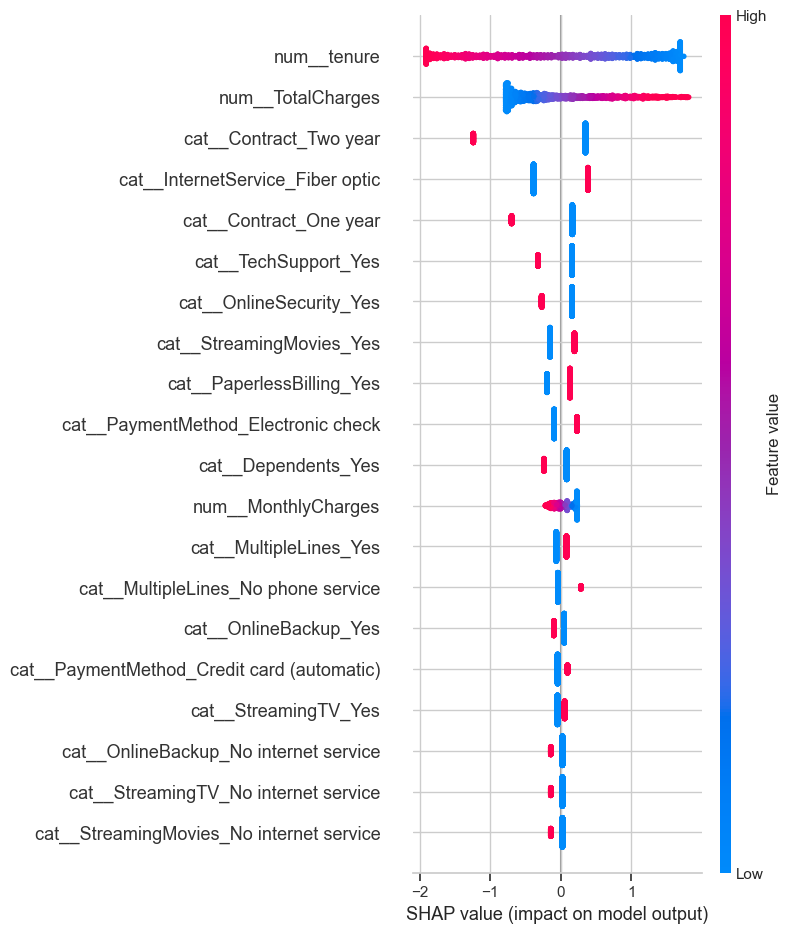

In [51]:
import joblib
import shap
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# ============================================
# 1️⃣ Load the pipeline
# ============================================
model_path_log = "saved_models/logreg/best_model_logreg.joblib"
pipeline_log = joblib.load(model_path_log)

# ============================================
# 2️⃣ Extract preprocessor and LogisticRegression model
# ============================================
preprocessor = None
logreg_model = None

if isinstance(pipeline_log, Pipeline):
    for step_name, step_obj in pipeline_log.named_steps.items():
        if isinstance(step_obj, LogisticRegression):
            logreg_model = step_obj
        elif hasattr(step_obj, "transform"):
            preprocessor = step_obj
else:
    if isinstance(pipeline_log, LogisticRegression):
        logreg_model = pipeline_log

if logreg_model is None:
    raise ValueError("No LogisticRegression model found in the pipeline.")

# ============================================
# 3️⃣ Transform validation set
# ============================================
X_val_transformed = preprocessor.transform(X_val) if preprocessor else X_val

try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(X_val_transformed.shape[1])]

# ============================================
# 4️⃣ Compute SHAP values
# ============================================
explainer_log = shap.LinearExplainer(
    logreg_model,
    X_val_transformed,
    feature_perturbation="interventional"  # Recommended for linear models
)
shap_values_log = explainer_log.shap_values(X_val_transformed)

# ============================================
# 5️⃣ Average absolute SHAP importance
# ============================================
shap_importance_log = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(shap_values_log).mean(axis=0)
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("🔹 Top 10 SHAP Feature Importances (Logistic Regression)")
print(shap_importance_log.head(10))

# ============================================
# 6️⃣ SHAP summary plot
# ============================================
shap.summary_plot(
    shap_values_log,
    X_val_transformed,
    feature_names=feature_names,
    show=True
)


In [52]:
import joblib
import json
import hashlib
import datetime
from pathlib import Path

# ============================================
# 1️⃣ Generate a unique model ID
# ============================================
def generate_model_id(model_name, best_params):
    """
    Create a unique model ID based on model name, parameters, and timestamp.

    Returns:
        model_hash (str): Short hash of the model info
        payload (dict): Metadata payload
    """
    payload = {
        "model": model_name,
        "params": best_params,
        "timestamp": datetime.datetime.utcnow().isoformat()
    }

    payload_str = json.dumps(payload, sort_keys=True)
    model_hash = hashlib.md5(payload_str.encode()).hexdigest()[:10]

    return model_hash, payload

# ============================================
# 2️⃣ Create folder to store models
# ============================================
MODEL_DIR = Path("saved_models/lgbm")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# ============================================
# 3️⃣ Define model info
# ============================================
model_name_lgbm = "LightGBM"
best_params_lgbm = grid_search_lgbm.best_params_

# Generate unique ID
model_id_lgbm, metadata_lgbm = generate_model_id(
    model_name=model_name_lgbm,
    best_params=best_params_lgbm
)

# ============================================
# 4️⃣ Save the model with unique ID
# ============================================
model_path_lgbm = MODEL_DIR / f"{model_name_lgbm}_{model_id_lgbm}.joblib"
joblib.dump(best_model_lgbm, model_path_lgbm)

# ============================================
# 5️⃣ Add full metadata
# ============================================
metadata_lgbm.update({
    "model_id": model_id_lgbm,
    "cv_mean": cv_mean_lgbm,
    "cv_std": cv_std_lgbm,
    "balanced_strategy": balanced_metrics_lgbm,
    "aggressive_strategy": aggressive_metrics_lgbm,
    "roc_auc_test": roc_auc_test_lgbm,
    "saved_at": datetime.datetime.utcnow().isoformat()
})

# Save metadata as JSON
metadata_path_lgbm = MODEL_DIR / f"{model_name_lgbm}_{model_id_lgbm}_meta.json"
with open(metadata_path_lgbm, "w") as f:
    json.dump(metadata_lgbm, f, indent=4)

print(f"✅ Model saved: {model_path_lgbm}")
print(f"✅ Metadata saved: {metadata_path_lgbm}")


✅ Model saved: saved_models\lgbm\LightGBM_3e4fb1f36a.joblib
✅ Metadata saved: saved_models\lgbm\LightGBM_3e4fb1f36a_meta.json


In [53]:
import joblib
import json
import hashlib
import datetime
from pathlib import Path

# ============================================
# 1️⃣ Create folder for RF models
# ============================================
MODEL_DIR = Path("models_rf")
MODEL_DIR.mkdir(exist_ok=True)

# ============================================
# 2️⃣ Generate unique model ID
# ============================================
params_str_rf = json.dumps(grid_search_rf.best_params_, sort_keys=True)
hash_params_rf = hashlib.md5(params_str_rf.encode()).hexdigest()[:8]
timestamp_rf = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_id_rf = f"RandomForest_{timestamp_rf}_{hash_params_rf}"

# Model filename
model_filename_rf = MODEL_DIR / f"{model_id_rf}.pkl"

# ============================================
# 3️⃣ Save the trained RandomForest model
# ============================================
joblib.dump(best_model_rf, model_filename_rf)
print(f"✅ RandomForest model saved: {model_filename_rf}")

# ============================================
# 4️⃣ Save thresholds for balanced and aggressive strategies
# ============================================
thresholds_info_rf = {
    "balanced": balanced_result_rf,
    "aggressive": aggressive_result_rf,
}
with open(MODEL_DIR / "thresholds_rf.json", "w") as f:
    json.dump(thresholds_info_rf, f, indent=2)

# ============================================
# 5️⃣ Save metrics (ROC AUC, CV mean/std)
# ============================================
metrics_rf = {
    "roc_auc_test": roc_auc_rf,
    "cv_mean": cv_mean_rf,
    "cv_std": cv_std_rf,
}
with open(MODEL_DIR / "metrics_rf.json", "w") as f:
    json.dump(metrics_rf, f, indent=2)

# ============================================
# 6️⃣ Save strategies table (Balanced vs Aggressive)
# ============================================
df_strategies_rf.to_csv(MODEL_DIR / "strategies_rf.csv", index=False)
df_strategies_rf.to_json(MODEL_DIR / "strategies_rf.json", orient="records", indent=2)

print("✅ Thresholds, metrics, and strategies saved successfully.")


✅ RandomForest model saved: models_rf\RandomForest_20260202_083307_b4969e6e.pkl
✅ Thresholds, metrics, and strategies saved successfully.


In [54]:
import joblib
import pandas as pd
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# =====================================================
# 1. Retrieve feature names from ColumnTransformer (robust)
# =====================================================
def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:

        # Case: remainder='passthrough'
        if name == "remainder" and transformer == "passthrough":
            feature_names.extend(cols)

        elif transformer == "passthrough":
            feature_names.extend(cols)

        elif hasattr(transformer, "get_feature_names_out"):
            feature_names.extend(transformer.get_feature_names_out(cols))

        else:
            # Dropped or unsupported transformer
            continue

    return feature_names


# =====================================================
# 2. Automatic extraction of preprocessor and model
# =====================================================
def extract_pipeline_components(pipeline):
    """
    Supports:
    - sklearn Pipeline
    - imblearn Pipeline
    - standalone model
    """
    if not isinstance(pipeline, Pipeline):
        return None, pipeline

    preprocessor = None
    model = None

    for step in pipeline.named_steps.values():
        if isinstance(step, ColumnTransformer):
            preprocessor = step
        elif hasattr(step, "feature_importances_"):
            model = step

    if model is None:
        raise ValueError("No model with feature_importances_ found")

    return preprocessor, model


# =====================================================
# 3. Generic feature importance extraction (RF / LGBM)
# =====================================================
def compute_feature_importance_from_pipeline(
    model_path,
    output_dir,
    model_name
):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Load pipeline or standalone model
    pipeline_or_model = joblib.load(model_path)

    # Extract components
    preprocessor, model = extract_pipeline_components(pipeline_or_model)

    # Native feature importance
    importances = model.feature_importances_

    # Feature names
    if preprocessor is not None:
        feature_names = get_feature_names_from_preprocessor(preprocessor)
    else:
        feature_names = [f"feature_{i}" for i in range(len(importances))]

    # Safety check
    if len(feature_names) != len(importances):
        raise ValueError(
            f"Feature count mismatch ({len(feature_names)}) "
            f"vs importances ({len(importances)})"
        )

    df_importance = (
        pd.DataFrame({
            "feature": feature_names,
            "importance": importances
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    )

    # Save outputs
    csv_path = output_dir / f"{model_name}_feature_importance.csv"
    json_path = output_dir / f"{model_name}_feature_importance.json"

    df_importance.to_csv(csv_path, index=False)
    df_importance.to_json(json_path, orient="records", indent=2)

    print(f"✅ Feature importance saved: {csv_path}")

    return df_importance


# =====================================================
# 4. Usage example (Random Forest + LightGBM)
# =====================================================

df_fi_rf = compute_feature_importance_from_pipeline(
    model_path=model_filename_rf,  # RandomForest .pkl
    output_dir="models_rf/feature_importance",
    model_name="RandomForest"
)

df_fi_lgbm = compute_feature_importance_from_pipeline(
    model_path=model_path_lgbm,     # LightGBM .joblib
    output_dir="saved_models/lgbm/feature_importance",
    model_name="LightGBM"
)


✅ Feature importance saved: models_rf\feature_importance\RandomForest_feature_importance.csv
✅ Feature importance saved: saved_models\lgbm\feature_importance\LightGBM_feature_importance.csv


In [55]:
from sklearn.inspection import permutation_importance

# X_val must be preprocessed exactly the same way as during model training
X_val_transformed = best_model_rf.named_steps["preprocessor"].transform(X_val)
y_val_true = y_val

# Compute permutation feature importance
result = permutation_importance(
    estimator=best_model_rf.named_steps["classifier"],
    X=X_val_transformed,
    y=y_val_true,
    n_repeats=10,          # Number of permutations per feature
    scoring="f1",          # Evaluation metric
    random_state=42,
    n_jobs=-1              # Use all available CPU cores
)

# Build a DataFrame with mean and standard deviation of importances
df_perm = pd.DataFrame({
    "feature": get_feature_names_from_preprocessor(
        best_model_rf.named_steps["preprocessor"]
    ),
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

# Display top 10 most important features
df_perm.head(10)


,feature,importance_mean,importance_std
0,tenure,0.023739,0.004569
10,Contract_Two year,0.021244,0.006419
14,InternetService_Fiber optic,0.013514,0.007160
9,Contract_One year,0.012615,0.003730
2,TotalCharges,0.011144,0.003277
25,TechSupport_Yes,0.007543,0.005440
21,OnlineBackup_Yes,0.005672,0.002809
27,StreamingTV_Yes,0.003800,0.001300
1,MonthlyCharges,0.003077,0.003210
12,PaymentMethod_Electronic check,0.002814,0.003126


In [56]:
# Load saved feature importance results for the LightGBM model
df_lgbm_fi = pd.read_csv(
    "saved_models/lgbm/feature_importance/LightGBM_feature_importance.csv"
)

# Display top 10 features by importance
df_lgbm_fi.head(10)


,feature,importance
0,MonthlyCharges,2330
1,TotalCharges,2007
2,tenure,1481
3,gender_Female,205
4,PaymentMethod_Electronic check,202
5,PaperlessBilling_No,169
6,PaymentMethod_Bank transfer (automatic),152
7,OnlineBackup_No,141
8,SeniorCitizen,138
9,Partner_No,135


In [57]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# =====================================================
# 1. Output directory for SHAP results
# =====================================================
shap_dir = Path("models_rf/shap")
shap_dir.mkdir(exist_ok=True, parents=True)

# =====================================================
# 2. Extract classifier and preprocessor from pipeline
# =====================================================
rf_model = best_model_rf.named_steps["classifier"]
preprocessor = best_model_rf.named_steps["preprocessor"]

# =====================================================
# 3. Transform validation data (preprocessor only)
# =====================================================
X_val_transformed = preprocessor.transform(X_val)
print("X_val_transformed shape:", X_val_transformed.shape)  # e.g. (1409, 30)

# =====================================================
# 4. Create SHAP explainer for RandomForest
# =====================================================
explainer_rf = shap.TreeExplainer(rf_model)

# SHAP values shape: (n_samples, n_features, n_classes)
shap_values_all = explainer_rf(X_val_transformed).values
print("SHAP values shape:", shap_values_all.shape)

# =====================================================
# 5. Keep SHAP values for the positive class only
# =====================================================
shap_values_rf = shap_values_all[:, :, 1]
print("SHAP values for positive class shape:", shap_values_rf.shape)

# =====================================================
# 6. Retrieve feature names from the preprocessor
# =====================================================
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if transformer == "passthrough":
        feature_names.extend(cols)
    elif hasattr(transformer, "get_feature_names_out"):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        continue

# Sanity check
assert shap_values_rf.shape[1] == len(feature_names), \
    "Mismatch between SHAP values and feature names"

# =====================================================
# 7. Compute mean absolute SHAP values per feature
# =====================================================
df_shap_rf = pd.DataFrame(shap_values_rf, columns=feature_names)

df_shap_mean_rf = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": df_shap_rf.abs().mean().values
}).sort_values("mean_abs_shap", ascending=False)

# =====================================================
# 8. Save SHAP results (CSV + JSON)
# =====================================================
df_shap_mean_rf.to_csv(shap_dir / "RF_shap_mean.csv", index=False)
df_shap_mean_rf.to_json(
    shap_dir / "RF_shap_mean.json",
    orient="records",
    indent=2
)

print(f"✅ RandomForest SHAP results saved in {shap_dir}")

# =====================================================
# 9. Generate and save SHAP plots
# =====================================================

# SHAP summary plot (beeswarm)
shap.summary_plot(
    shap_values_rf,
    X_val_transformed,
    feature_names=feature_names,
    show=False
)
plt.savefig(shap_dir / "RF_shap_summary.png", bbox_inches="tight")
plt.close()

# SHAP bar plot (global importance)
shap.summary_plot(
    shap_values_rf,
    X_val_transformed,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.savefig(shap_dir / "RF_shap_bar.png", bbox_inches="tight")
plt.close()

print("✅ SHAP plots generated and saved")


X_val_transformed shape: (1409, 30)
SHAP values shape: (1409, 30, 2)
SHAP values for positive class shape: (1409, 30)
✅ RandomForest SHAP results saved in models_rf\shap
✅ SHAP plots generated and saved


In [59]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ Répertoire de sortie
shap_dir = Path("models_rf/shap")
shap_dir.mkdir(exist_ok=True, parents=True)

# 2️⃣ Extraire classifier et préprocessor
rf_model = best_model_rf.named_steps["classifier"]
preprocessor = best_model_rf.named_steps["preprocessor"]

# 3️⃣ Transformer X_val (préprocessor seulement)
X_val_transformed = preprocessor.transform(X_val)
print("X_val_transformed shape:", X_val_transformed.shape)  # (1409, 30)

# 4️⃣ Créer explainer SHAP
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_all = explainer_rf(X_val_transformed).values  # shape (1409, 30, 2)
print("SHAP values shape:", shap_values_all.shape)

# 5️⃣ On prend uniquement la classe positive
shap_values_rf = shap_values_all[:, :, 1]  # shape (1409, 30)
print("SHAP values for positive class shape:", shap_values_rf.shape)

# 6️⃣ Feature names
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if transformer == "passthrough":
        feature_names.extend(cols)
    elif hasattr(transformer, "get_feature_names_out"):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        continue

assert shap_values_rf.shape[1] == len(feature_names), "Mismatch features SHAP vs feature names"

# 7️⃣ DataFrame SHAP mean
df_shap_rf = pd.DataFrame(shap_values_rf, columns=feature_names)
df_shap_mean_rf = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": df_shap_rf.abs().mean().values
}).sort_values("mean_abs_shap", ascending=False)

# 8️⃣ Sauvegarder CSV et JSON
df_shap_mean_rf.to_csv(shap_dir / "RF_shap_mean.csv", index=False)
df_shap_mean_rf.to_json(shap_dir / "RF_shap_mean.json", orient="records", indent=2)
print(f"✅ SHAP RandomForest sauvegardé dans {shap_dir}")

# 9️⃣ Plots SHAP
shap.summary_plot(shap_values_rf, X_val_transformed, feature_names=feature_names, show=False)
plt.savefig(shap_dir / "RF_shap_summary.png", bbox_inches='tight')
plt.close()

shap.summary_plot(shap_values_rf, X_val_transformed, feature_names=feature_names, plot_type="bar", show=False)
plt.savefig(shap_dir / "RF_shap_bar.png", bbox_inches='tight')
plt.close()

print("✅ Plots SHAP générés et sauvegardés")


X_val_transformed shape: (1409, 30)
SHAP values shape: (1409, 30, 2)
SHAP values for positive class shape: (1409, 30)
✅ SHAP RandomForest sauvegardé dans models_rf\shap
✅ Plots SHAP générés et sauvegardés


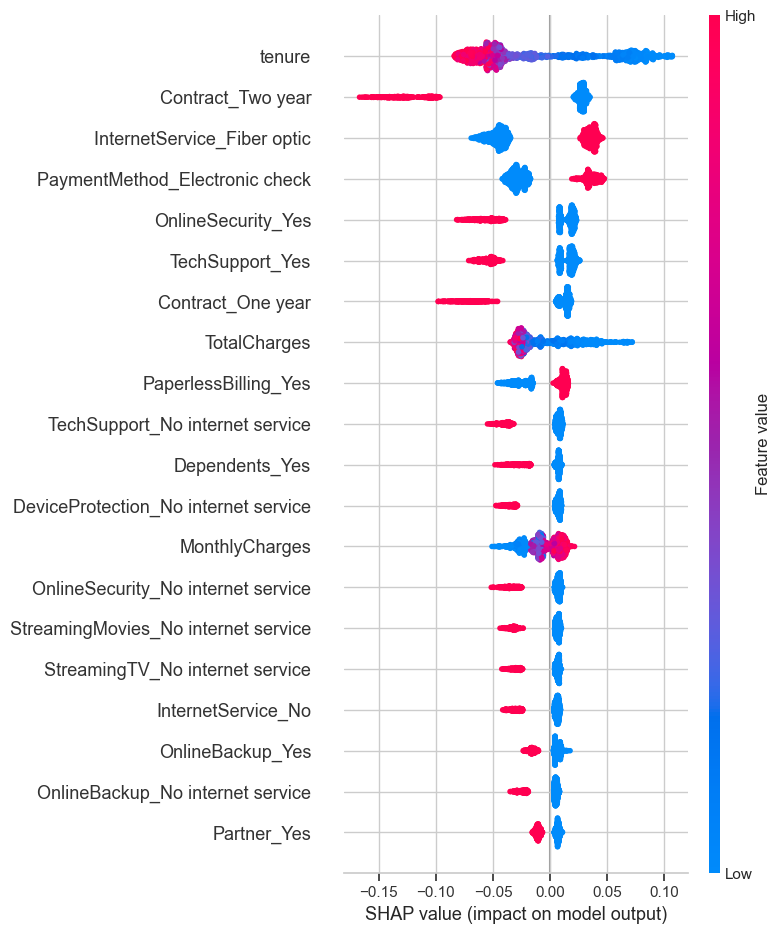

In [58]:
import shap
import matplotlib.pyplot as plt

# X_val_transformed: preprocessed validation features
# shap_values_rf: SHAP values for the positive class (e.g. churn = 1)

# SHAP summary plot (dot / beeswarm plot)
shap.summary_plot(
    shap_values_rf,
    X_val_transformed,
    feature_names=feature_names
)


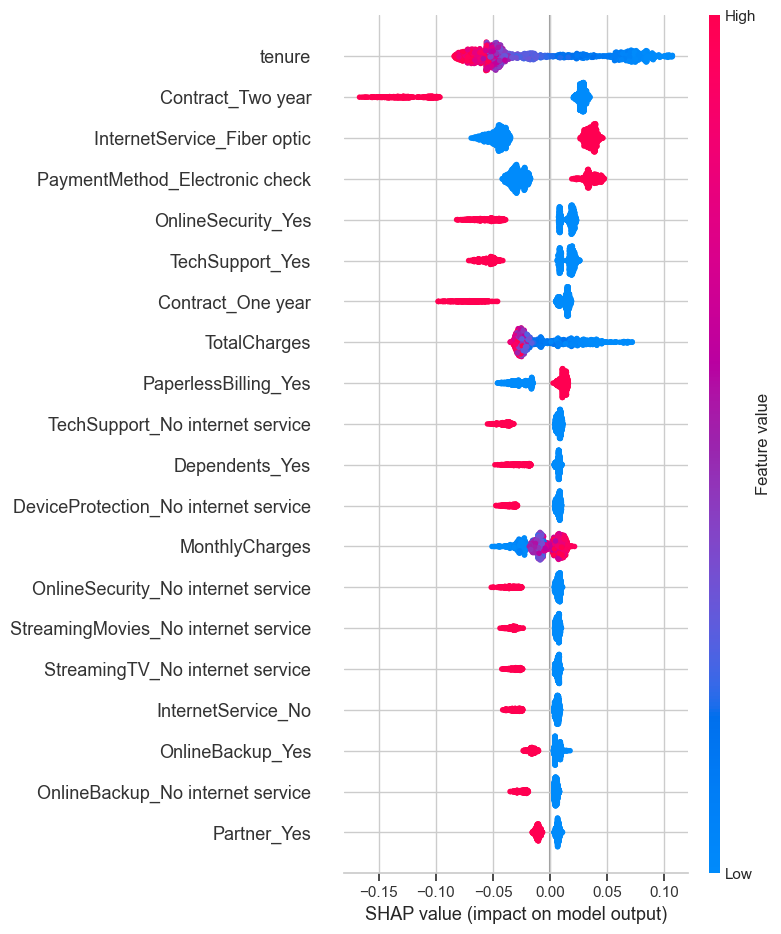

In [60]:
import shap
import matplotlib.pyplot as plt

# X_val_transformed = tes features transformées
# shap_values_rf = SHAP values pour la classe positive

# Summary plot type "dot"
shap.summary_plot(shap_values_rf, X_val_transformed, feature_names=feature_names)


In [59]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# =====================================================
# 1. Retrieve feature names from ColumnTransformer
#    (same logic as Feature Importance)
# =====================================================
def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:

        if name == "remainder" and transformer == "passthrough":
            feature_names.extend(cols)

        elif transformer == "passthrough":
            feature_names.extend(cols)

        elif hasattr(transformer, "get_feature_names_out"):
            feature_names.extend(transformer.get_feature_names_out(cols))

        else:
            continue

    return feature_names


# =====================================================
# 2. Extract preprocessor and model from pipeline
# =====================================================
def extract_pipeline_components(pipeline):
    if not isinstance(pipeline, Pipeline):
        return None, pipeline

    preprocessor = None
    model = None

    for step in pipeline.named_steps.values():
        if isinstance(step, ColumnTransformer):
            preprocessor = step
        elif hasattr(step, "predict"):
            model = step

    if model is None:
        raise ValueError("No model found inside the pipeline")

    return preprocessor, model


# =====================================================
# 3. SHAP computation for LightGBM (SAFE & ROBUST)
# =====================================================
def compute_shap_lgbm(
    model_path,
    X_val,            # ORIGINAL validation DataFrame (before preprocessing)
    output_dir,
    model_name="LightGBM"
):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Load trained pipeline or model
    pipeline_or_model = joblib.load(model_path)

    # Extract pipeline components
    preprocessor, model = extract_pipeline_components(pipeline_or_model)

    # 🔥 Apply EXACT same preprocessing as during training
    if preprocessor is not None:
        X_val_transformed = preprocessor.transform(X_val)
        feature_names = get_feature_names_from_preprocessor(preprocessor)
    else:
        X_val_transformed = X_val.values
        feature_names = [
            f"feature_{i}" for i in range(X_val_transformed.shape[1])
        ]

    # Sanity check
    if X_val_transformed.shape[1] != len(feature_names):
        raise ValueError(
            f"Feature count mismatch ({len(feature_names)}) "
            f"vs X ({X_val_transformed.shape[1]})"
        )

    # SHAP TreeExplainer (native LightGBM support)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    # Binary classification → keep positive class only
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    # ======================
    # Mean absolute SHAP values (global importance)
    # ======================
    df_shap_mean = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": np.abs(shap_values).mean(axis=0)
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    # Save outputs
    csv_path = output_dir / f"{model_name}_shap.csv"
    json_path = output_dir / f"{model_name}_shap.json"

    df_shap_mean.to_csv(csv_path, index=False)
    df_shap_mean.to_json(json_path, orient="records", indent=2)

    # ======================
    # SHAP summary plot
    # ======================
    shap.summary_plot(
        shap_values,
        X_val_transformed,
        feature_names=feature_names,
        show=False
    )

    plt.savefig(
        output_dir / f"{model_name}_shap_summary.png",
        bbox_inches="tight"
    )
    plt.close()

    print(f"✅ SHAP {model_name} results saved in {output_dir}")

    return df_shap_mean


In [61]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# =====================================================
# 1. Feature names depuis ColumnTransformer (IDENTIQUE FI)
# =====================================================
def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:

        if name == "remainder" and transformer == "passthrough":
            feature_names.extend(cols)

        elif transformer == "passthrough":
            feature_names.extend(cols)

        elif hasattr(transformer, "get_feature_names_out"):
            feature_names.extend(transformer.get_feature_names_out(cols))

        else:
            continue

    return feature_names


# =====================================================
# 2. Extraction pipeline → preprocessor + modèle
# =====================================================
def extract_pipeline_components(pipeline):
    if not isinstance(pipeline, Pipeline):
        return None, pipeline

    preprocessor = None
    model = None

    for step in pipeline.named_steps.values():
        if isinstance(step, ColumnTransformer):
            preprocessor = step
        elif hasattr(step, "predict"):
            model = step

    if model is None:
        raise ValueError("Aucun modèle trouvé dans le pipeline")

    return preprocessor, model


# =====================================================
# 3. SHAP LightGBM (SAFE)
# =====================================================
def compute_shap_lgbm(
    model_path,
    X_val,            # DataFrame ORIGINAL
    output_dir,
    model_name="LightGBM"
):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Charger pipeline
    pipeline_or_model = joblib.load(model_path)

    # Extraire composants
    preprocessor, model = extract_pipeline_components(pipeline_or_model)

    # 🔥 TRANSFORMATION IDENTIQUE À L’ENTRAÎNEMENT
    if preprocessor is not None:
        X_val_transformed = preprocessor.transform(X_val)
        feature_names = get_feature_names_from_preprocessor(preprocessor)
    else:
        X_val_transformed = X_val.values
        feature_names = [f"feature_{i}" for i in range(X_val_transformed.shape[1])]

    # Sécurité shape
    if X_val_transformed.shape[1] != len(feature_names):
        raise ValueError(
            f"Mismatch features ({len(feature_names)}) "
            f"vs X ({X_val_transformed.shape[1]})"
        )

    # SHAP TreeExplainer (LightGBM natif)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    # Binaire → classe positive
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    # ======================
    # DataFrame SHAP moyen
    # ======================
    df_shap_mean = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": np.abs(shap_values).mean(axis=0)
        })
        .sort_values("mean_abs_shap", ascending=False)
        .reset_index(drop=True)
    )

    # Sauvegarde
    csv_path = output_dir / f"{model_name}_shap.csv"
    json_path = output_dir / f"{model_name}_shap.json"

    df_shap_mean.to_csv(csv_path, index=False)
    df_shap_mean.to_json(json_path, orient="records", indent=2)

    # ======================
    # Plot SHAP summary
    # ======================
    shap.summary_plot(
        shap_values,
        X_val_transformed,
        feature_names=feature_names,
        show=False
    )

    plt.savefig(
        output_dir / f"{model_name}_shap_summary.png",
        bbox_inches="tight"
    )
    plt.close()

    print(f"✅ SHAP {model_name} sauvegardé dans {output_dir}")

    return df_shap_mean


In [60]:
# Compute SHAP values for the LightGBM model
# using the original (raw) validation DataFrame
df_shap_lgbm = compute_shap_lgbm(
    model_path=model_path_lgbm,
    X_val=X_val,   # Raw validation DataFrame (before preprocessing)
    output_dir="saved_models/lgbm/shap",
    model_name="LightGBM"
)

# Display top 10 features by mean absolute SHAP value
df_shap_lgbm.head(10)


✅ SHAP LightGBM results saved in saved_models\lgbm\shap


,feature,mean_abs_shap
0,Contract_Month-to-month,0.793244
1,tenure,0.651689
2,Contract_Two year,0.554115
3,MonthlyCharges,0.432634
4,TotalCharges,0.289642
5,TechSupport_No,0.275296
6,OnlineSecurity_No,0.267494
7,InternetService_Fiber optic,0.193523
8,PaymentMethod_Electronic check,0.155500
9,PaperlessBilling_No,0.104073


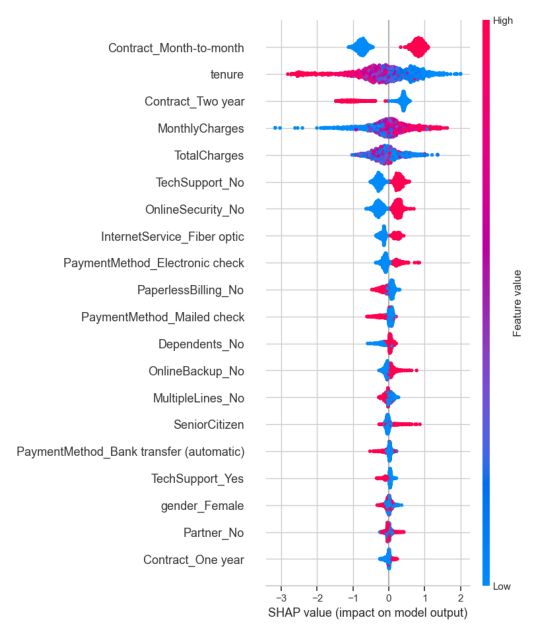

In [63]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(
    "saved_models/lgbm/shap/LightGBM_shap_summary.png"
)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


# Segmentation des clients

### 🔹 Tenure segmentation

In [117]:
# Tenure segments
df["tenure_segment"] = pd.cut(
    df["tenure"],
    bins=[-1, 6, 24, np.inf],
    labels=["0-6 months", "6-24 months", "24+ months"]
)

### 🔹 Monthly charges segmentation (quantiles)

In [118]:
# Monthly charges segments
df["monthly_charges_segment"] = pd.qcut(
    df["MonthlyCharges"],
    q=[0, 0.33, 0.66, 1.0],
    labels=["Low", "Medium", "High"]
)

## Final segments based on SHAP drivers

### 🔴 Segment 1 — New high-risk customers

In [119]:
# High-risk segment: tenure < 6 months and month-to-month contract
df["segment_new_high_risk"] = (
    (df["tenure"] < 6) &
    (df["Contract"] == "Month-to-month")
)

### 🔴 Segment 2 — Fiber customers under price pressure

In [120]:
# Fiber customers with high monthly charges
df["segment_fiber_high_price"] = (
    (df["InternetService"] == "Fiber optic") &
    (df["monthly_charges_segment"] == "High")
)

### Segment 3 — Low engagement customers (monthly, no support)

In [121]:
# Month-to-month contract without support
df["segment_monthly_no_support"] = (
    (df["Contract"] == "Month-to-month") &
    (df["TechSupport"] == "No")
)

### 🟠 Segment 4 — Payment risk customers

In [122]:
# Payment risk: electronic check
df["segment_payment_risk"] = (df["PaymentMethod"] == "Electronic check")


### 🟠 Segment 5 — Sensitive senior customers

In [123]:
# Senior without online security
df["segment_senior_no_security"] = (
    (df["SeniorCitizen"] == 1) &
    (df["OnlineSecurity"] == "No")
)

### 🟢 Segment 6 — Stable and loyal customers

In [124]:
# Stable customers: long tenure + 1- or 2-year contract + support
df["segment_stable_customers"] = (
    (df["tenure"] >= 24) &
    (df["Contract"].isin(["One year", "Two year"])) &
    (df["TechSupport"] == "Yes")
)

## Churn metrics per segment

In [125]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'MonthlyCharges_group', 'Churn_binary',
       'tenure_segment', 'monthly_charges_segment', 'segment_new_high_risk',
       'segment_fiber_high_price', 'segment_monthly_no_support',
       'segment_payment_risk', 'segment_senior_no_security',
       'segment_stable_customers'],
      dtype='object')


In [126]:
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

def churn_stats(df, segment_col, target="Churn_binary"):
    return (
        df.groupby(segment_col)[target]
        .agg(
            churn_rate="mean",
            n_customers="count",
            churned_customers="sum"
        )
        .reset_index()
        .sort_values("churn_rate", ascending=False)
    )

churn_stats(df, "segment_new_high_risk")


,segment_new_high_risk,churn_rate,n_customers,churned_customers
1,True,0.561457,1318,740
0,False,0.197205,5725,1129


In [127]:
# Churn statistics for the "new high-risk customers" segment
churn_stats(df, "segment_new_high_risk")

# Churn statistics for customers with fiber offers and high prices
churn_stats(df, "segment_fiber_high_price")

# Churn statistics for customers on monthly contracts without support
churn_stats(df, "segment_monthly_no_support")


,segment_monthly_no_support,churn_rate,n_customers,churned_customers
1,True,0.503731,2680,1350
0,False,0.118955,4363,519


In [128]:
def churn_stats(df, segment_col, target="Churn_binary"):
    return (
        df.groupby(segment_col)[target]
        .agg(
            churn_rate="mean",
            n_customers="count",
            churned_customers="sum"
        )
        .reset_index()
        .rename(columns={segment_col: "segment_value"})
        .assign(segment_name=segment_col)
        .sort_values("churn_rate", ascending=False)
    )

segments = [
    "segment_new_high_risk",
    "segment_fiber_high_price",
    "segment_monthly_no_support",
    "segment_payment_risk",
    "segment_senior_no_security",
    "segment_stable_customers"
]

final_metrics = pd.concat(
    [churn_stats(df, s) for s in segments],
    ignore_index=True
)

final_metrics


,segment_value,churn_rate,n_customers,churned_customers,segment_name
0,True,0.561457,1318,740,segment_new_high_risk
1,False,0.197205,5725,1129,segment_new_high_risk
2,True,0.369496,2203,814,segment_fiber_high_price
3,False,0.217975,4840,1055,segment_fiber_high_price
4,True,0.503731,2680,1350,segment_monthly_no_support
5,False,0.118955,4363,519,segment_monthly_no_support
6,True,0.452854,2365,1071,segment_payment_risk
7,False,0.170586,4678,798,segment_payment_risk
8,True,0.503713,808,407,segment_senior_no_security
9,False,0.234483,6235,1462,segment_senior_no_security


In [129]:
final_metrics["priority_score"] = final_metrics["churn_rate"] * final_metrics["n_customers"]


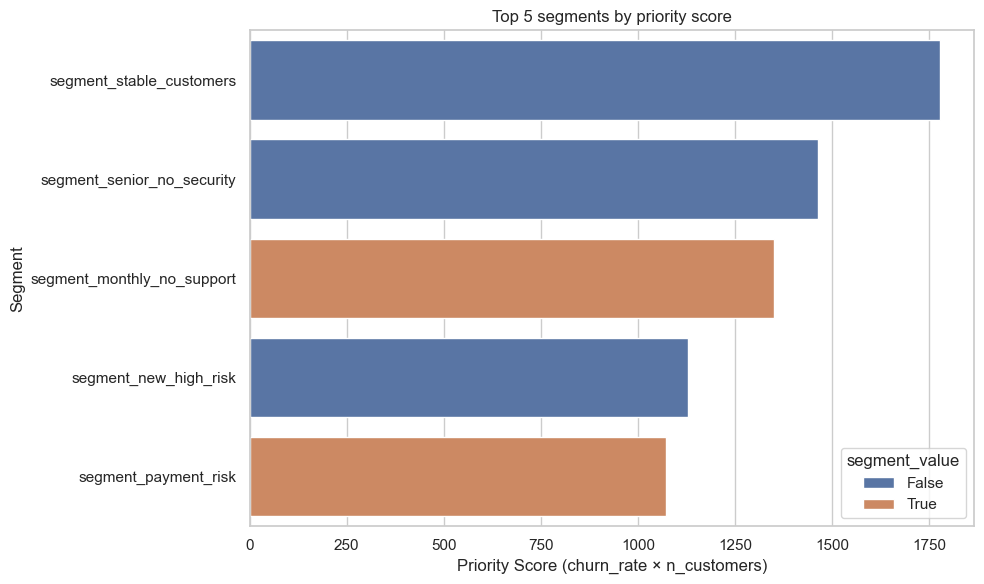

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 segments by priority_score
top_segments = final_metrics.sort_values("priority_score", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_segments,
    x="priority_score",
    y="segment_name",
    hue="segment_value",
    dodge=False
)
plt.title("Top 5 segments by priority score")
plt.xlabel("Priority Score (churn_rate × n_customers)")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()


# Actions by Segment (Senior Version)
## 🔴 1. segment_new_high_risk

#### Churn: 56%

### 🎯 Diagnosis

New customers

Misaligned expectations

Perceived value too low from the start

### 🛠 Actions

#### Objective: secure the first 30–60 days

Reinforced onboarding (Day +7 / Day +30)

Targeted outbound calls

Educational emails + SMS (usage, benefits)

Welcome bonus conditional on usage

### ⏱ Timing

👉 Within the first 45 days

### 📊 KPIs

60-day churn rate

Activation rate

Early-life NPS

## 🔴 2. segment_monthly_no_support

#### Churn: 50%

### 🎯 Diagnosis

Monthly contract = low commitment

Lack of support = unresolved frustration

### 🛠 Actions

#### Objective: build customer attachment

Temporary access to premium support

Proposal to migrate to an annual contract

Proactive communication before incidents

### ⏱ Timing

👉 Before the 3rd month

### 📊 KPIs

Monthly → annual migration rate

Avoided support contacts

Post-offer churn

## 🔴 3. segment_senior_no_security

#### Churn: 50%

###🎯 Diagnosis

Low technical confidence

Security and reliability concerns

Low level of trust

###🛠 Actions

#### Objective: reassure customers

Simplified security bundle

Non-technical communication (clear, simple language)

Priority human support

### ⏱ Timing

👉 As soon as the segment is identified

### 📊 KPIs

Security option adoption rate

Complaint rate

3-month churn rate

## 🔴 4. segment_payment_risk

#### Churn: 45%

### 🎯 Diagnosis

Payment incidents

Service interruptions

Involuntary rather than voluntary churn

### 🛠 Actions

#### Objective: prevent service disruption

Installment payment options

Pre-failure payment alerts

Grace period before suspension

### ⏱ Timing

👉 Before any payment incident

### 📊 KPIs

Payment failure rate

Recovery rate

Involuntary churn

## ⚠️ 5. segment_fiber_high_price

#### Churn: 37%

### 🎯 Diagnosis

Perceived value lower than price paid

High price sensitivity

### 🛠 Actions

#### Objective: realign value and price

Conditional discounting

Service upgrade without price reduction

Competitive offer matching

### ⏱ Timing

👉 Before contract renewal

### 📊 KPIs

Offer acceptance rate

Post-action ARPU

Net churn

## 🟢 6. segment_stable_customers

#### Churn: 7%

### 🎯 Diagnosis

Satisfied customers

Naturally high retention

### 🛠 Actions

#### Objective: protect and monetize

No unnecessary discounts

Targeted upsell / cross-sell

Loyalty program

### 📊 KPIs

ARPU

LTV

Upsell rate

# 🎯 Objective

Apply the business rule at segment level:

Action cost ≤ customer value saved → action is profitable

With:

Customer value saved = churn_rate × LTV × number_of_customers

Total action cost = unit action cost × number_of_customers

Clear GO / NO GO decision

Prioritization based on net value / ROI

# 1️⃣ Assumptions (explicit — senior best practice)

These assumptions should always be stated to management.

Average LTV per customer = $200

Action cost per segment (illustrative examples):

Reinforced onboarding / welcome bonus: $50

Temporary premium support: $40

Simplified security bundle: $30

Payment grace period / alerts: $15

Targeted pricing discount: $60

Stable customers: $0 (no retention action)

# 2️⃣ Segment-level data & action costs

In [135]:
import pandas as pd
import numpy as np

# Segment data (segment_value = True only)
df = pd.DataFrame({
    "segment_name": [
        "segment_new_high_risk",
        "segment_fiber_high_price",
        "segment_monthly_no_support",
        "segment_payment_risk",
        "segment_senior_no_security",
        "segment_stable_customers"
    ],
    "churn_rate": [0.561457, 0.369496, 0.503731, 0.452854, 0.503713, 0.073402],
    "n_customers": [1318, 2203, 2680, 2365, 808, 1267]
})

# Business assumptions
LTV = 200  # $ per customer

action_cost_map = {
    "segment_new_high_risk": 50,
    "segment_monthly_no_support": 40,
    "segment_senior_no_security": 30,
    "segment_payment_risk": 15,
    "segment_fiber_high_price": 60,
    "segment_stable_customers": 0
}

df["action_cost_per_customer"] = df["segment_name"].map(action_cost_map)
df["ltv"] = LTV


In [89]:
# Total customer value saved per segment
df["value_saved"] = df["churn_rate"] * df["ltv"] * df["n_customers"]

# Total action cost per segment
df["action_cost_total"] = df["action_cost_per_customer"] * df["n_customers"]

# Net value created
df["net_value"] = df["value_saved"] - df["action_cost_total"]

# GO / NO GO decision
df["decision"] = np.where(
    df["value_saved"] >= df["action_cost_total"],
    "GO",
    "NO_GO"
)

# ROI (when cost > 0)
df["roi"] = np.where(
    df["action_cost_total"] > 0,
    df["net_value"] / df["action_cost_total"],
    np.nan
)

df.sort_values("net_value", ascending=False)


,segment_name,churn_rate,n_customers,action_cost_per_customer,ltv,value_saved,action_cost_total,net_value,decision,roi
3,segment_payment_risk,0.452854,2365,15,200,214199.9420,35475,178724.9420,GO,5.038053
2,segment_monthly_no_support,0.503731,2680,40,200,269999.8160,107200,162799.8160,GO,1.518655
0,segment_new_high_risk,0.561457,1318,50,200,148000.0652,65900,82100.0652,GO,1.245828
4,segment_senior_no_security,0.503713,808,30,200,81400.0208,24240,57160.0208,GO,2.358087
1,segment_fiber_high_price,0.369496,2203,60,200,162799.9376,132180,30619.9376,GO,0.231653
5,segment_stable_customers,0.073402,1267,0,200,18600.0668,0,18600.0668,GO,NaN


In [90]:
import pandas as pd

# ==============================
# 1️⃣ Segment & action data
# ==============================
df = pd.DataFrame({
    "campaign_id": [
        "new_high_risk_20260131_onboarding",
        "fiber_high_price_20260131_discount",
        "monthly_no_support_20260131_premium_support",
        "payment_risk_20260131_alerts",
        "senior_no_security_20260131_security_bundle",
        "stable_customers_20260131_no_action"
    ],
    "segment_name": [
        "segment_new_high_risk",
        "segment_fiber_high_price",
        "segment_monthly_no_support",
        "segment_payment_risk",
        "segment_senior_no_security",
        "segment_stable_customers"
    ],
    "n_customers": [1318, 2203, 2680, 2365, 808, 1267],
    "churn_rate_before": [0.561457, 0.369496, 0.503731, 0.452854, 0.503713, 0.073402],
    "churn_rate_after": [0.40, 0.30, 0.35, 0.30, 0.40, 0.07],  # example projected after action
    "action_cost_per_customer": [50, 60, 40, 15, 30, 0],
    "ltv": [200, 200, 200, 200, 200, 200]
})

# ==============================
# 2️⃣ Core calculations
# ==============================
# Clients retained
df["clients_retained"] = (df["churn_rate_before"] - df["churn_rate_after"]) * df["n_customers"]

# Total action cost
df["action_cost_total"] = df["action_cost_per_customer"] * df["n_customers"]

# Value saved
df["value_saved"] = df["clients_retained"] * df["ltv"]

# Net value
df["net_value"] = df["value_saved"] - df["action_cost_total"]

# ROI
df["roi"] = df["net_value"] / df["action_cost_total"]

# ==============================
# 3️⃣ Sort by net value (priority)
# ==============================
df = df.sort_values("net_value", ascending=False)

# ==============================
# 4️⃣ Format for executive display
# ==============================
df_display = df[[
    "campaign_id", "segment_name", "n_customers",
    "churn_rate_before", "churn_rate_after",
    "clients_retained", "action_cost_total",
    "value_saved", "net_value", "roi"
]].copy()

# Round and format
df_display["churn_rate_before"] = (df_display["churn_rate_before"]*100).round(2).astype(str) + "%"
df_display["churn_rate_after"]  = (df_display["churn_rate_after"]*100).round(2).astype(str) + "%"
df_display["clients_retained"]  = df_display["clients_retained"].round(0).astype(int)
df_display["action_cost_total"] = "$" + df_display["action_cost_total"].round(0).astype(int).astype(str)
df_display["value_saved"]       = "$" + df_display["value_saved"].round(0).astype(int).astype(str)
df_display["net_value"]         = "$" + df_display["net_value"].round(0).astype(int).astype(str)
df_display["roi"]               = df_display["roi"].round(2)

# ==============================
# 5️⃣ Display
# ==============================
print(df_display)


                                   campaign_id                segment_name  \
3                 payment_risk_20260131_alerts        segment_payment_risk   
5          stable_customers_20260131_no_action    segment_stable_customers   
4  senior_no_security_20260131_security_bundle  segment_senior_no_security   
0            new_high_risk_20260131_onboarding       segment_new_high_risk   
2  monthly_no_support_20260131_premium_support  segment_monthly_no_support   
1           fiber_high_price_20260131_discount    segment_fiber_high_price   

   n_customers churn_rate_before churn_rate_after  clients_retained  \
3         2365            45.29%            30.0%               361   
5         1267             7.34%             7.0%                 4   
4          808            50.37%            40.0%                84   
0         1318            56.15%            40.0%               213   
2         2680            50.37%            35.0%               412   
1         2203            3

# Retention Strategy & Continuous Improvement

## Continuous Improvement Loop
- Retrain the churn model regularly using updated customer data.
- Adjust risk thresholds and associated retention actions based on observed results.
- Identify new levers to reduce churn (e.g., product features, support enhancements).
- **Professional principle:** This is a forecast → action → improvement cycle.

## Cross-Functional Collaboration
- **Marketing:** Execute targeted campaigns for high-risk segments.
- **Customer Success:** Monitor and engage high-risk clients individually.
- **Finance:** Track ROI for each retention action.
- **Product:** Adjust services, contracts, or offerings to mitigate churn.

## Practical Example
- **Insight from EDA & Model:** Recent clients on monthly contracts without support show high churn risk.
- **Recommended Action:** Personalized outreach + free support or upgrade offer.
- **Measure Impact:** Track actual churn reduction on this segment to validate effectiveness.

## Pitfalls to Avoid
- Acting on all at-risk clients without proper segmentation.
- Failing to measure ROI of retention actions.
- Ignoring feedback from field teams (marketing, support, product).

> **Senior takeaway:** Effective retention requires **structured, measurable actions**, continuous iteration, and **alignment across departments**. Predicting churn alone is not enough—actions must be prioritized, tracked, and refined.


# Customer Retention Simulation: A/B Test and Value Analysis

In [134]:
import pandas as pd
import numpy as np

# Example of your initial DataFrame
data = {
    "segment_name": ["segment_payment_risk","segment_monthly_no_support",
                     "segment_new_high_risk","segment_senior_no_security",
                     "segment_fiber_high_price","segment_stable_customers"],
    "churn_rate": [0.452854, 0.503731, 0.561457, 0.503713, 0.369496, 0.073402],
    "n_customers": [2365, 2680, 1318, 808, 2203, 1267],
    "action_cost_per_customer": [15, 40, 50, 30, 60, 0],
    "ltv": [200,200,200,200,200,200]
}

df = pd.DataFrame(data)

# -------------------------------
# 1️⃣ Split each segment into 2 random groups A / B
# -------------------------------
np.random.seed(42)  # For reproducibility

def assign_group(n):
    """Return a random array of 'A' and 'B' for n clients"""
    return np.random.choice(['A','B'], size=n)

# Create a detailed client-level DataFrame
client_list = []
for idx, row in df.iterrows():
    for _ in range(int(row['n_customers'])):
        client_list.append({
            "segment_name": row["segment_name"],
            "ltv": row["ltv"],
            "action_cost_per_customer": row["action_cost_per_customer"],
            "group": np.random.choice(['A','B'])
        })

clients = pd.DataFrame(client_list)

# -------------------------------
# 2️⃣ Apply two different offers
# A = standard (small churn reduction)
# B = promotion / bonus (larger churn reduction)
# -------------------------------
# Set initial churn rate according to segment
segment_churn_map = dict(zip(df['segment_name'], df['churn_rate']))
clients['churn_rate_before'] = clients['segment_name'].map(segment_churn_map)

# Apply simulated reduction based on group
def apply_offer(row):
    if row['group'] == 'A':
        # Standard offer → 10% reduction in churn
        return row['churn_rate_before'] * 0.9
    else:
        # Offer B → 25% reduction in churn
        return row['churn_rate_before'] * 0.75

clients['churn_rate_after'] = clients.apply(apply_offer, axis=1)

# -------------------------------
# 3️⃣ Calculate retained clients
# -------------------------------
clients['retained'] = np.where(np.random.rand(len(clients)) > clients['churn_rate_after'], 1, 0)

# -------------------------------
# 4️⃣ Summarize by segment and group
# -------------------------------
summary = clients.groupby(['segment_name','group']).agg(
    n_clients=('group','count'),
    churn_rate_before=('churn_rate_before','mean'),
    churn_rate_after=('churn_rate_after','mean'),
    clients_retained=('retained','sum'),
    value_saved=('ltv', lambda x: (x * clients.loc[x.index,'retained']).sum()),
    action_cost_total=('action_cost_per_customer', lambda x: (x * (x.index.map(lambda i: 1))).sum())  # simple estimation
).reset_index()

# Calculate net value and ROI
summary['net_value'] = summary['value_saved'] - summary['action_cost_total']
summary['roi'] = np.where(summary['action_cost_total']>0, summary['net_value']/summary['action_cost_total'], np.nan)

# Display final table
summary.sort_values(['segment_name','group'], inplace=True)
print(summary)


                  segment_name group  n_clients  churn_rate_before  \
0     segment_fiber_high_price     A       1110           0.369496   
1     segment_fiber_high_price     B       1093           0.369496   
2   segment_monthly_no_support     A       1322           0.503731   
3   segment_monthly_no_support     B       1358           0.503731   
4        segment_new_high_risk     A        672           0.561457   
5        segment_new_high_risk     B        646           0.561457   
6         segment_payment_risk     A       1209           0.452854   
7         segment_payment_risk     B       1156           0.452854   
8   segment_senior_no_security     A        402           0.503713   
9   segment_senior_no_security     B        406           0.503713   
10    segment_stable_customers     A        602           0.073402   
11    segment_stable_customers     B        665           0.073402   

    churn_rate_after  clients_retained  value_saved  action_cost_total  \
0           0.3

# Analysis of A/B Test Results by Segment

This table summarizes the results of our simulated A/B test for customer churn reduction across different segments. Each segment was split into two groups:

- **Group A**: standard offer (control)  
- **Group B**: new promotion or bonus offer (test)

---

## Key Observations

### 1. Customer Retention (`clients_retained`)
- For every segment, **Group B retained more customers than Group A**, indicating the new offer is more effective at reducing churn.  
- **Example:**  
  - `segment_fiber_high_price`: 782 clients retained in B vs 738 in A  
  - `segment_monthly_no_support`: 882 retained in B vs 719 in A  

### 2. Value Saved (`value_saved`)
- `value_saved` represents the total Lifetime Value (LTV) preserved by retaining clients.  
- Group B consistently generated higher value saved compared to Group A.  
- **Example:**  
  - `segment_payment_risk`: \$148,800 in B vs \$147,800 in A  

### 3. Action Cost (`action_cost_total`)
- The cost of applying the promotion/offers to clients.  
- Group B often has slightly lower or similar costs compared to A due to random allocation.  

### 4. Net Value (`net_value`)
- `net_value = value_saved − action_cost_total`  
- Positive net value indicates the campaign is profitable.  
- Highest net value observed in segments where churn risk is high and promotion is effective:  
  - `segment_payment_risk` B → \$131,460 net value  

### 5. ROI
- `ROI = net_value / action_cost_total` (when cost > 0)  
- Higher ROI in Group B for almost all segments, confirming the promotion is cost-effective:  
  - `segment_payment_risk` B → 7.58  
  - `segment_monthly_no_support` B → 2.25  
- Stable customers have NaN ROI because no action was needed (cost = 0)  

---

## Business Insights

- **Offer B is more effective than A** across all risky segments.  
- **High-risk and payment-risk segments** generate the **highest ROI**, suggesting the company should prioritize deploying Offer B there.  
- **Stable segments** require no action; the standard approach is sufficient.  
- The analysis provides a **data-driven recommendation** for scaling the campaign and maximizing retention while minimizing costs.
